# Deforestation Dataset
---
An exploratory analysis. 

LINK: https://www.kaggle.com/datasets/konradb/deforestation-dataset?resource=download

Importing libraries:

In [560]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Importing Data:

In [561]:
# Defining the path to file:
path = 'goal15.forest_shares.csv'

# Assigning dataframe to a variable:
df = pd.read_csv(path, delimiter=';')

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


## Firsts Steps:

- Removing unecessary columns;

- Renaming columns;

- Checking duplicates;

- Checking types;

- Main informations: mean, median, countrows, min and max.

### Removing Unecessary Column

 As the column trend is the percentual of growth or decrease between 2020 and 2000 we will remove it. Because is not a new information, but a relation between the other columns.

In [562]:
# Removing the column 'trend'
df = df[['iso3c', 'forests_2000', 'forests_2020']]

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


### Renaming the Columns:

In [563]:
# To make easier the understanding, we will rename the columns:

# Renaming
new_names = {'iso3c': 'country', 'forests_2000': 'f_2000', 'forests_2020': 'f_2020'}
df = df.rename(columns=new_names)

# Preview:
df.head(5)

,country,f_2000,f_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


### Checking Duplicates

To check the duplicates, we will check first in the dataset to search duplicate lines. And after, just on the country column, to search if there exists duplicate countries.

In [564]:
# Checking the Duplicates on Dataset:
total_duplicates = df.duplicated().sum()
print("Total duplicates on dataset: ",total_duplicates)

Total duplicates on dataset:  0


In [565]:
# Checking the Duplicates on country column:
country_duplicates = df.duplicated(subset=['country']).sum()
print("Duplicated countries: ",country_duplicates)

Duplicated countries:  0


As the dataset do not show any duplicated value, we don't need any data treatment.

### Checking Data Type:

In [566]:
# Checking the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  237 non-null    object 
 1   f_2000   237 non-null    float64
 2   f_2020   237 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


Data type are in accordance with the expectation.

### Main Statistics Information

In [567]:
# Main information:
df.describe()

,f_2000,f_2020
count,237.000000,237.000000
mean,32.255274,31.585654
std,25.366225,24.744673
min,0.000000,0.000000
25%,9.900000,10.400000
50%,30.300000,30.300000
75%,50.900000,49.800000
max,98.300000,97.400000


## Complementing the analysis with more data

- Region, Sub Region, Continent and Development;

- Country Area

### Region, Sub Region and Continent
To complement the visualization of the dataset, I will bring the information of the name of the continent and the full name of the country from the dataset:

LINK: https://datahub.io/core/country-codes#data

In [568]:
# Defining the path to file:
path2 = 'country-codes_csv.csv'

# Assigning dataframe to a variable:
country_info = pd.read_csv(path2, delimiter=';')

# Preview:
country_info.head(5)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,ITU,IOC,DS,UNTERM Spanish Formal,Global Code,Intermediate Region Code,official_name_fr,UNTERM French Short,ISO4217-currency_name,Developed / Developing Countries,UNTERM Russian Formal,UNTERM English Short,ISO4217-currency_alphabetic_code,Small Island Developing States (SIDS),UNTERM Spanish Short,ISO4217-currency_numeric_code,UNTERM Chinese Formal,UNTERM French Formal,UNTERM Russian Short,M49,Sub-region Code,Region Code,official_name_ar,ISO4217-currency_minor_unit,UNTERM Arabic Formal,UNTERM Chinese Short,Land Locked Developing Countries (LLDC),Intermediate Region Name,official_name_es,UNTERM English Formal,official_name_cn,official_name_en,ISO4217-currency_country_name,Least Developed Countries (LDC),Region Name,UNTERM Arabic Short,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925.0,TW,NaN,TW,NaN,TPE,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1.0,AF,AF,AF,AFG,AFG,AFG,República Islámica del Afganistán (la),VERDADEIRO,NaN,Afghanistan,Afghanistan (l') [masc.],Afghani,Developing,????????? ?????????? ??????????,Afghanistan,AFN,NaN,Afganistán (el),971,?????????,République islamique d'Afghanistan,??????????,4.0,34.0,142.0,?????????,2,??????? ????????? ?????????,???,x,NaN,Afganistán,the Islamic Republic of Afghanistan,???,Afghanistan,AFGHANISTAN,x,Asia,?????????,Southern Asia,??????????,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3.0,AL,AB,AL,ALB,ALB,AL,la República de Albania,VERDADEIRO,NaN,Albanie,Albanie (l') [fém.],Lek,Developed,?????????? ???????,Albania,ALL,NaN,Albania,8,????????,la République d'Albanie,???????,8.0,39.0,150.0,???????,2,??????? ???????,?????,NaN,NaN,Albania,the Republic of Albania,?????,Albania,ALBANIA,NaN,Europe,???????,Southern Europe,???????,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4.0,AG,AL,DZ,ALG,ALG,DZ,la República Argelina Democrática y Popular,VERDADEIRO,NaN,Algérie,Algérie (l') [fém.],Algerian Dinar,Developing,????????? ???????? ??????????????? ??????????,Algeria,DZD,NaN,Argelia,12,????????????,la République algérienne démocratique et popul...,?????,12.0,15.0,2.0,???????,2,????????? ????????? ??????????? ???????,?????,NaN,NaN,Argelia,the People's Democratic Republic of Algeria,?????,Algeria,ALGERIA,NaN,Africa,???????,Northern Africa,?????,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5.0,AQ,NaN,AS,SMA,ASA,USA,NaN,VERDADEIRO,NaN,Samoa américaines,NaN,US Dollar,Developing,NaN,NaN,USD,x,NaN,840,NaN,NaN,NaN,16.0,61.0,9.0,????? ?????????,2,NaN,NaN,NaN,NaN,Samoa Americana,NaN,?????,American Samoa,AMERICAN SAMOA,NaN,Oceania,NaN,Polynesia,???????????? ?????,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [569]:
# Defining the essential columns to merge with our first dataset:
country_info = country_info[["ISO3166-1-Alpha-3","Developed / Developing Countries","official_name_en","Region Name","Sub-region Name"]]
country_info.head(5)

,ISO3166-1-Alpha-3,Developed / Developing Countries,official_name_en,Region Name,Sub-region Name
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [570]:
# To make easier the understanding, we will rename the columns:

# Renaming
new_names2 = {'ISO3166-1-Alpha-3': 'country', 'Developed / Developing Countries': 'development', 'official_name_en': 'country_name', 'Region Name': 'continent', 'Sub-region Name': 'region'}
country_info = country_info.rename(columns=new_names2)

# Preview:
country_info.head(5)

,country,development,country_name,continent,region
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [571]:
# Merging dataframes:

dataframe = pd.merge(df, country_info, on='country', how='inner', indicator=True)


# Preview:
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,_merge
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,both
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,both
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,both
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,both
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,both


In [572]:
# Checking if all the countries were merged:
dataframe.describe()

,f_2000,f_2020
count,236.000000,236.000000
mean,32.256780,31.587288
std,25.420128,24.797253
min,0.000000,0.000000
25%,9.875000,10.275000
50%,29.950000,30.200000
75%,51.200000,49.875000
max,98.300000,97.400000


By carefully examining and comparing the results between the .info() of the initial dataset and the result of the .info() from the merged dataset, you can identify that there is a missing row. We will investigate this further in the following lines of code:

In [573]:
missing_row = df[~df['country'].isin(dataframe['country'])]

# Exibir a linha perdida
print("Missing row:")
print(missing_row)

Missing row:
    country  f_2000  f_2020
233     WLD    31.9    31.2


As the country in the first dataset is referred to the ISO 3116 code for countries, in the official site of ISO, we will search for this code.

Acessing https://www.iso.org/iso-3166-country-codes.html, we follow the first link, redirecting to a search site:

https://www.iso.org/obp/ui/#search

Searching for 'WLD', no results were found. 

So, we can assume that the first dataset has a outlier. As the page in the Kaggle does not mentioned this case and is not in the official site of ISO 3166, we can remove it form our analysis.

In [574]:
# Dropping the merge column:
dataframe = dataframe.drop('_merge', axis=1)

# Preview:
dataframe.head(3)

,country,f_2000,f_2020,development,country_name,continent,region
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa


### Country Area

To update the dataset with this information, I picked up the dataset from the organization site:

https://data.worldbank.org/indicator/AG.LND.TOTL.K2?name_desc=false

The organization bring real statistics from the world.

In [575]:
# Defining the path to file:
path3 = 'country-area.csv'

# Assigning dataframe to a variable:
country_area = pd.read_csv(path3, sep=';')


# Preview:
country_area.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Land area (sq. km),AG.LND.TOTL.K2,NaN,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,NaN,NaN
1,Africa Eastern and Southern,AFE,Land area (sq. km),AG.LND.TOTL.K2,NaN,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14571611,14.720.190.922,14.720.236.092,14.720.228.252,14.720.274.665,14720236.89,14.720.269.284,14.720.957.055,14721240.05,14.845.170.142,14.845.132.326,14.845.085.467,14.845.139.128,14.845.146.968,14.845.135.053,14.845.150.143,14.845.162.404,14.845.123.094,NaN,NaN
2,Afghanistan,AFG,Land area (sq. km),AG.LND.TOTL.K2,NaN,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,652230,NaN,NaN
3,Africa Western and Central,AFW,Land area (sq. km),AG.LND.TOTL.K2,NaN,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046580,9046180,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045780,9045773,NaN,NaN
4,Angola,AGO,Land area (sq. km),AG.LND.TOTL.K2,NaN,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,1246700,NaN,NaN


The dataset bring the area since 1960. We will use the most recent year with the NaN values less than 5% of dataset length

In [576]:
# Threshold of NaN values:

threshold = len(country_area)*0.05

print('The NaN values threshold is: ',threshold)

The NaN values threshold is:  13.3


In [577]:
# Finding the NaN values by columns:

country_area.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              253
1961               20
1962                7
1963                7
1964                7
1965                7
1966                7
1967                7
1968                7
1969                7
1970                7
1971                7
1972                7
1973                7
1974                7
1975                7
1976                7
1977                7
1978                7
1979                7
1980                7
1981                7
1982                7
1983                7
1984                7
1985                7
1986                7
1987                7
1988                7
1989                7
1990                7
1991                7
1992                7
1993                6
1994                6
1995                6
1996                6
1997                6
1998                6
1999                6
2000                5
2001      

As we can see, the last year that the area count was less than the threshold is 2020. So, the area that will be used is from 2020:

In [578]:
# Organizing the area dataset:

country_area = country_area[['Country Code', '2020']]

# Renaming
new_names3 = {'Country Code': 'country', '2020': 'area_country'}
country_area = country_area.rename(columns=new_names3)

#Preview
country_area.head(5)

,country,area_country
0,ABW,180
1,AFE,14.845.123.094
2,AFG,652230
3,AFW,9045773
4,AGO,1246700


Not all the countries has area, so the merge will not be an inner join:

In [579]:
# Merging dataframes:

dataframe = pd.merge(dataframe, country_area, on='country', how='left')


# Preview:
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,area_country
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381741
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470


In [580]:
# Checking the dataframe lenght:

len(dataframe)

236

Checking the forests areas in sq.km:

In [581]:
# Checking the column types for operations:
dataframe.dtypes

country          object
f_2000          float64
f_2020          float64
development      object
country_name     object
continent        object
region           object
area_country     object
dtype: object

In [582]:
# Converting area type:
dataframe['area_country'] = dataframe['area_country'].str.replace('.', '').astype(float)
dataframe.head(5)

C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13088\2001417126.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe['area_country'] = dataframe['area_country'].str.replace('.', '').astype(float)


,country,f_2000,f_2020,development,country_name,continent,region,area_country
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381741.0
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0


In [583]:
# Calculating absolut area:
dataframe['2000_sqkm'] = dataframe['f_2000']*dataframe['area_country']/100
dataframe['2020_sqkm'] = dataframe['f_2020']*dataframe['area_country']/100



dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,area_country,2000_sqkm,2020_sqkm
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,12392.370,12392.370
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,7699.400,7891.200
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381741.0,16672.187,19053.928
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0,177.400,171.400
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0,159.800,159.800


In [584]:
# Reordering columns:
dataframe = dataframe[['country','country_name','development','region','continent','area_country','2000_sqkm','f_2000','2020_sqkm','f_2020']]


# Preview
dataframe.head(3)

,country,country_name,development,region,continent,area_country,2000_sqkm,f_2000,2020_sqkm,f_2020
0,AFG,Afghanistan,Developing,Southern Asia,Asia,652230.0,12392.370,1.9,12392.370,1.9
1,ALB,Albania,Developed,Southern Europe,Europe,27400.0,7699.400,28.1,7891.200,28.8
2,DZA,Algeria,Developing,Northern Africa,Africa,2381741.0,16672.187,0.7,19053.928,0.8


Now, the dataset is ready for analysis!

## Understanding more about the dataset

### Describing the columns:

In [585]:
dataframe.columns

Index(['country', 'country_name', 'development', 'region', 'continent',
       'area_country', '2000_sqkm', 'f_2000', '2020_sqkm', 'f_2020'],
      dtype='object')

Quickly describing the dataset, it has the following columns:

'country' -> Abbreviation of the country name.

'country_name' -> Full name of the country.

'development' -> Whether the country is developed or developing.

'region' -> Region of the globe where the country is located.

'continent' -> Continent of the country.

'area_country' -> Total area of the country in square kilometers [sqkm].

'2000_sqkm' -> Forest area in the country in 2000.

'f_2000' -> Percentage of forest area in the country, in 2000, compared to the total area.

'2020_sqkm' -> Forest area in the country in 2020.

'f_2020' -> Percentage of forest area in the country, in 2020, compared to the total area.


### Class Frequency

Categorical values info

In [586]:
# Development:
dataframe['development'].value_counts()

Developing    175
Developed      61
Name: development, dtype: int64

In [587]:
# Region:
dataframe['region'].value_counts()

Sub-Saharan Africa                 51
Latin America and the Caribbean    50
Western Asia                       18
Southern Europe                    16
Northern Europe                    15
South-eastern Asia                 11
Eastern Europe                     10
Polynesia                          10
Southern Asia                       9
Western Europe                      9
Northern Africa                     7
Micronesia                          7
Northern America                    5
Eastern Asia                        5
Melanesia                           5
Central Asia                        5
Australia and New Zealand           3
Name: region, dtype: int64

In [588]:
# Continent:
dataframe['continent'].value_counts()

Africa      58
Americas    55
Europe      50
Asia        48
Oceania     25
Name: continent, dtype: int64

### General info:

In [589]:
# Numerical value infos:
dataframe.describe()

,area_country,2000_sqkm,f_2000,2020_sqkm,f_2020
count,2.020000e+02,2.020000e+02,236.000000,2.020000e+02,236.000000
mean,1.946163e+07,4.212302e+06,32.256780,4.208260e+06,31.587288
std,1.421700e+08,2.824383e+07,25.420128,2.813424e+07,24.797253
min,1.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.166500e+04,1.407184e+03,9.875000,1.413000e+03,10.275000
50%,1.078600e+05,2.202784e+04,29.950000,2.220913e+04,30.200000
75%,5.013450e+05,1.221235e+05,51.200000,1.243386e+05,49.875000
max,1.557507e+09,2.814329e+08,98.300000,2.798038e+08,97.400000


In [590]:
# The shape of the dataset:
dataframe.shape

(236, 10)

## Understanding distribuition and maximum and minimum area percent:

Distribution of forests in 2000 and 2020 -  Histplot;

Country with the highest percentage of area in 2000 and 2020 -  Histplot;

Country with the lower percentage of area in 2000 and 2020.

### Forests Distribution 

In [591]:
sns.set_theme(palette='tab10',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('bmh')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

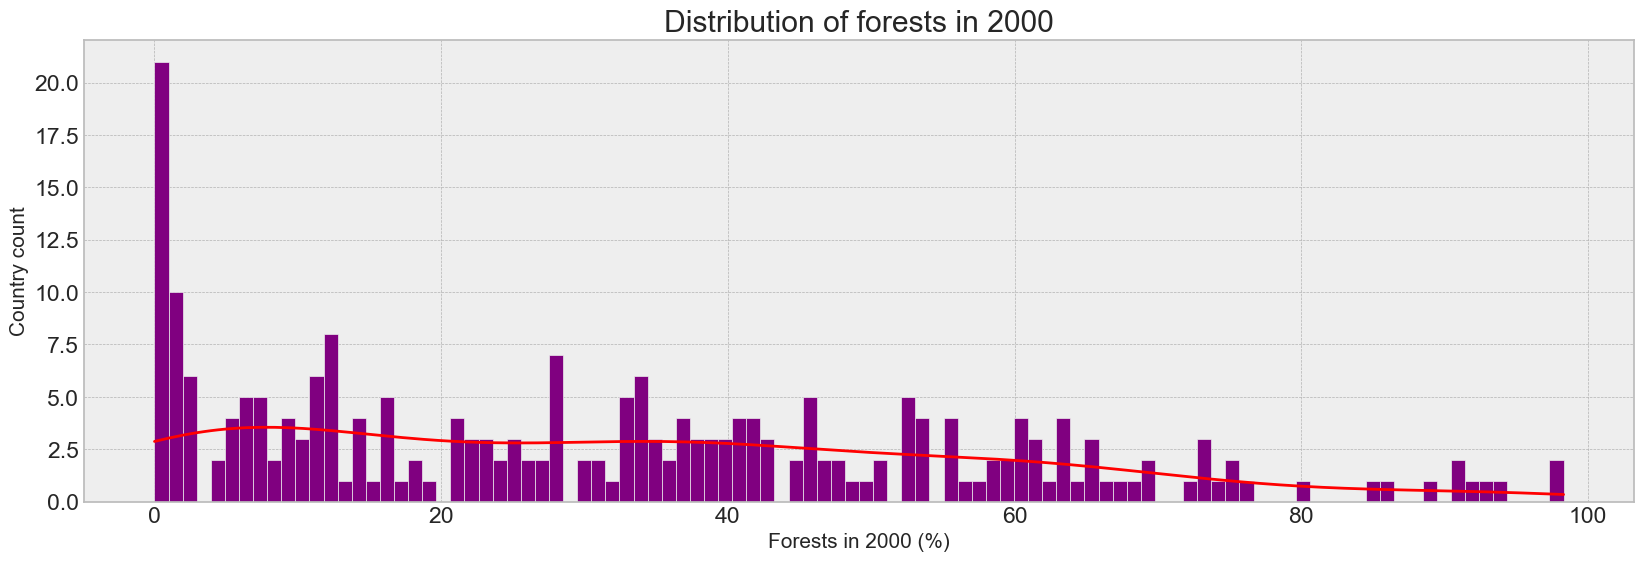

In [592]:
# Distribution of forests in 2000
plt.figure(figsize=(20, 6))
sns.histplot(data=dataframe, x="f_2000", kde=True, bins = 100,color = "red", facecolor = "purple")

plt.xlabel("Forests in 2000 (%)")
plt.ylabel("Country count")
plt.title("Distribution of forests in 2000")
plt.show()

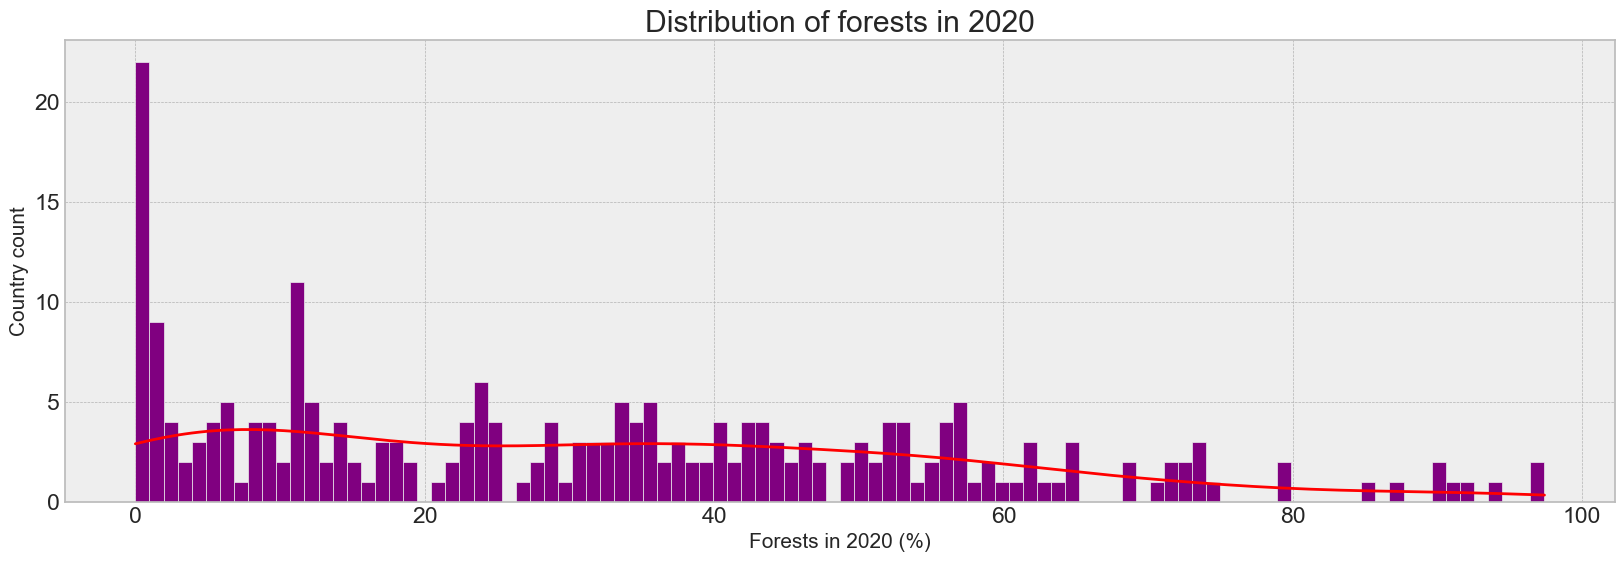

In [593]:
# Distribution of forests in 2020
plt.figure(figsize=(20, 6))
sns.histplot(data=dataframe, x="f_2020", kde = "True", bins = 100,color = "red", facecolor = "purple")

plt.xlabel("Forests in 2020 (%)")
plt.ylabel("Country count")
plt.title("Distribution of forests in 2020")
plt.show()

Amount of area by continent, region and development:

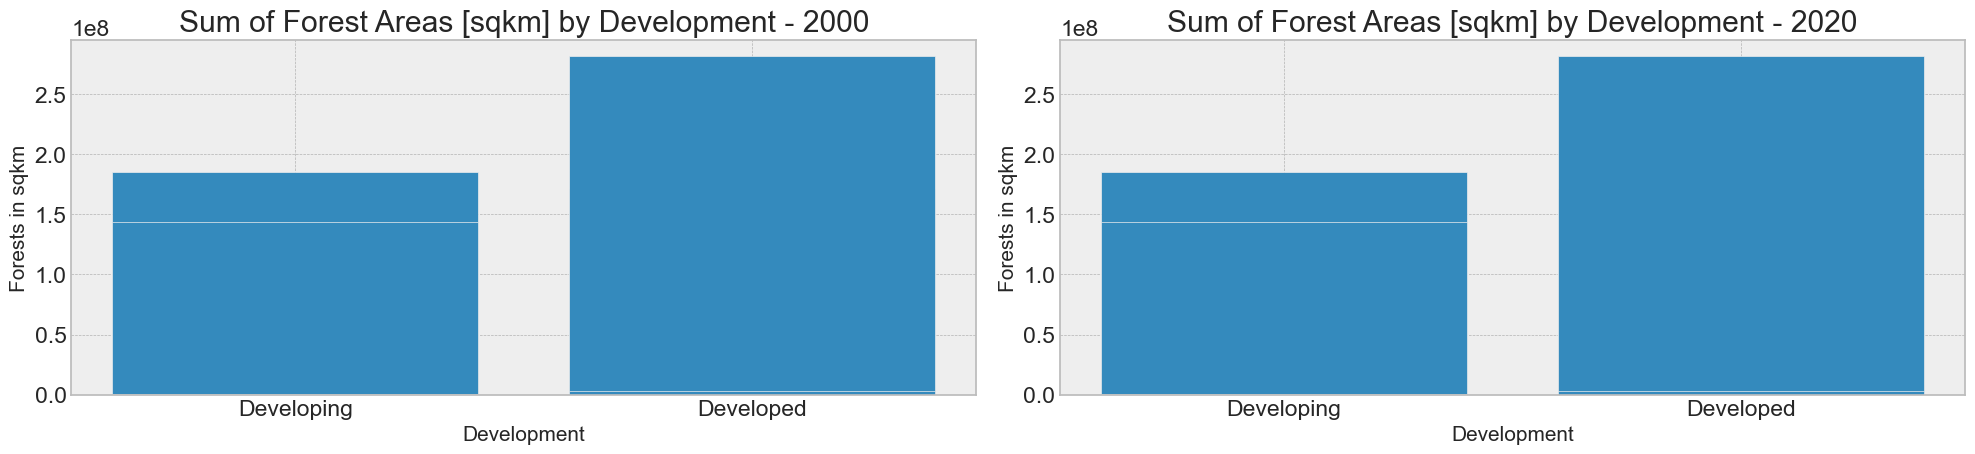

In [594]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].bar(dataframe['development'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Development')
axes[0].set_ylabel('Forests in sqkm')
axes[0].set_title('Sum of Forest Areas [sqkm] by Development - 2000')

axes[1].bar(dataframe['development'], dataframe['2000_sqkm'])
axes[1].set_xlabel('Development')
axes[1].set_ylabel('Forests in sqkm')
axes[1].set_title('Sum of Forest Areas [sqkm] by Development - 2020')  

# Adjust the layout for better visualization
plt.tight_layout()

plt.show()

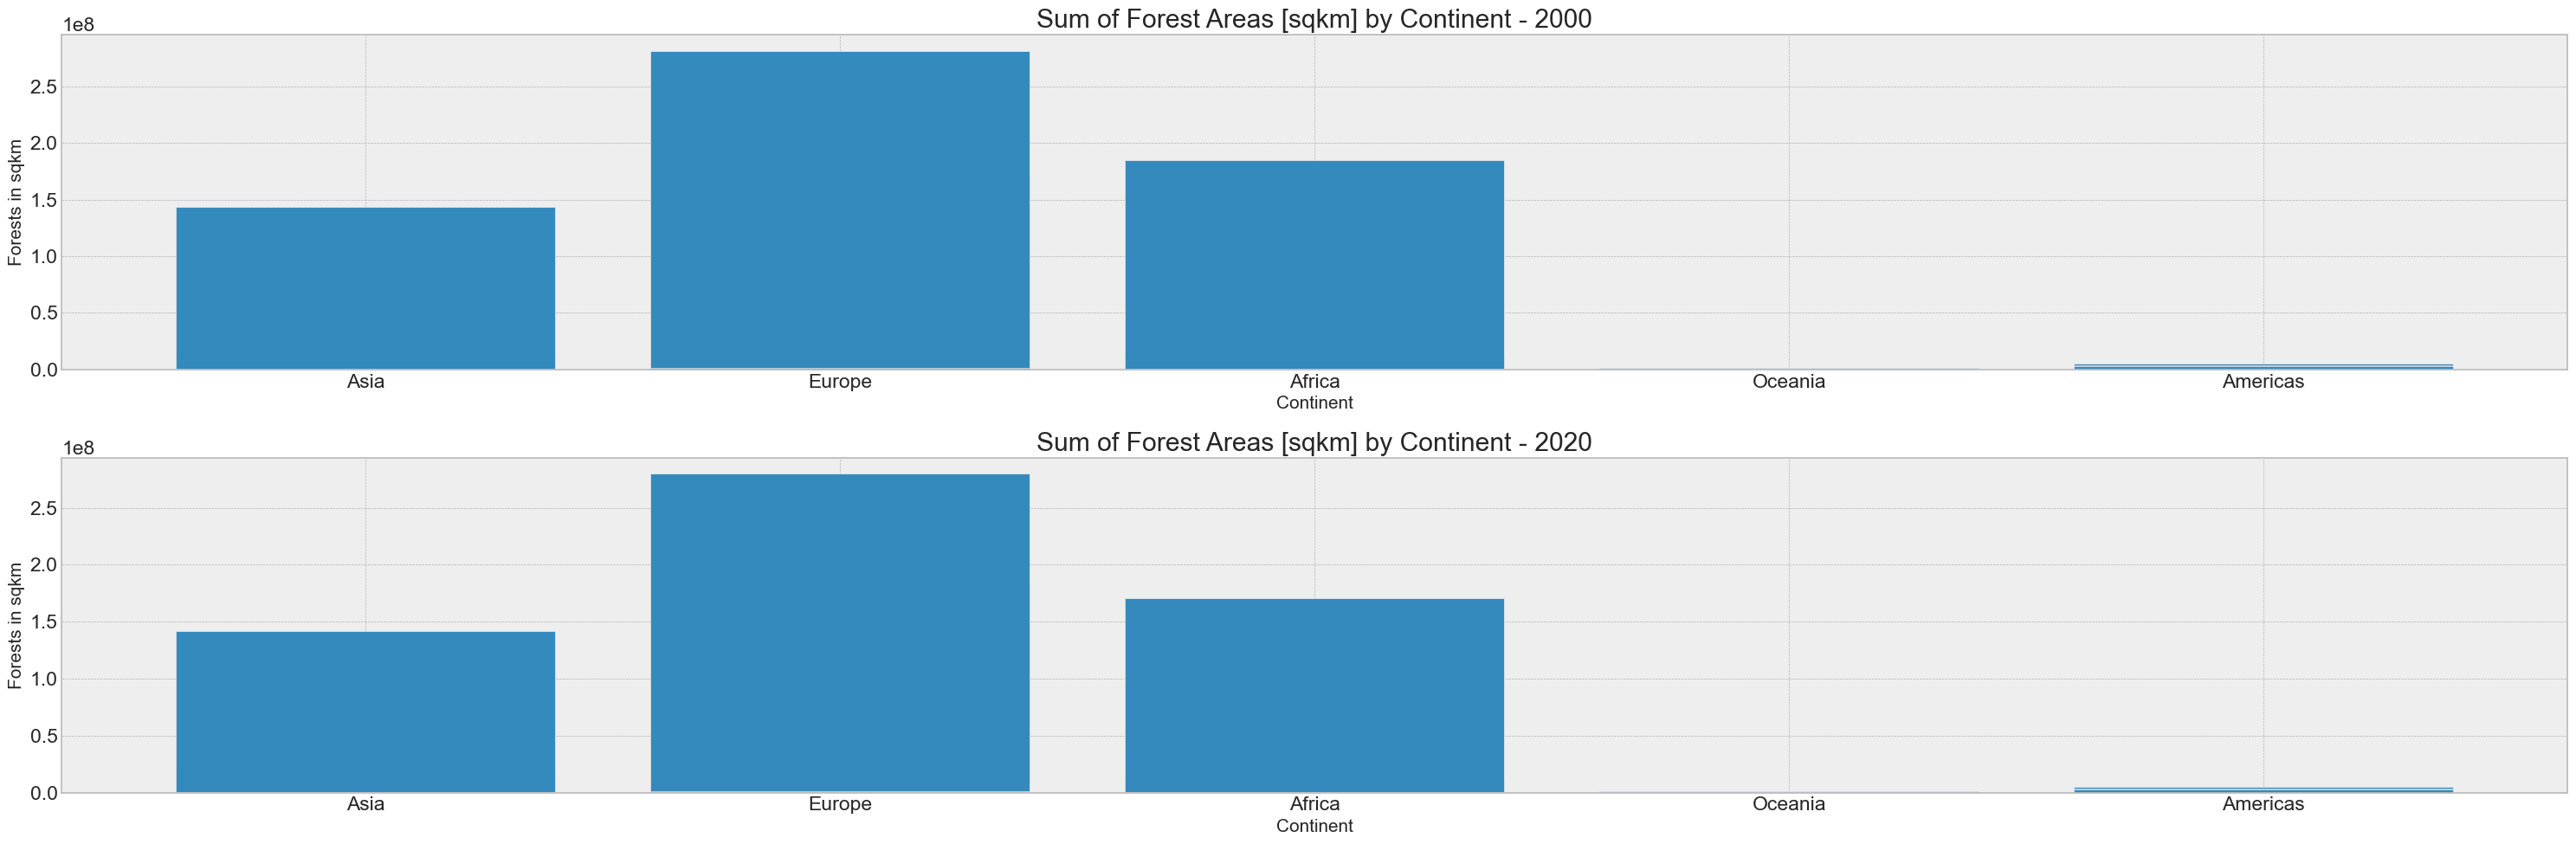

In [595]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

axes[0].bar(dataframe['continent'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Forests in sqkm')
axes[0].set_title('Sum of Forest Areas [sqkm] by Continent - 2000')

axes[1].bar(dataframe['continent'], dataframe['2020_sqkm'])
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Forests in sqkm')
axes[1].set_title('Sum of Forest Areas [sqkm] by Continent - 2020')

plt.tight_layout()

plt.show()

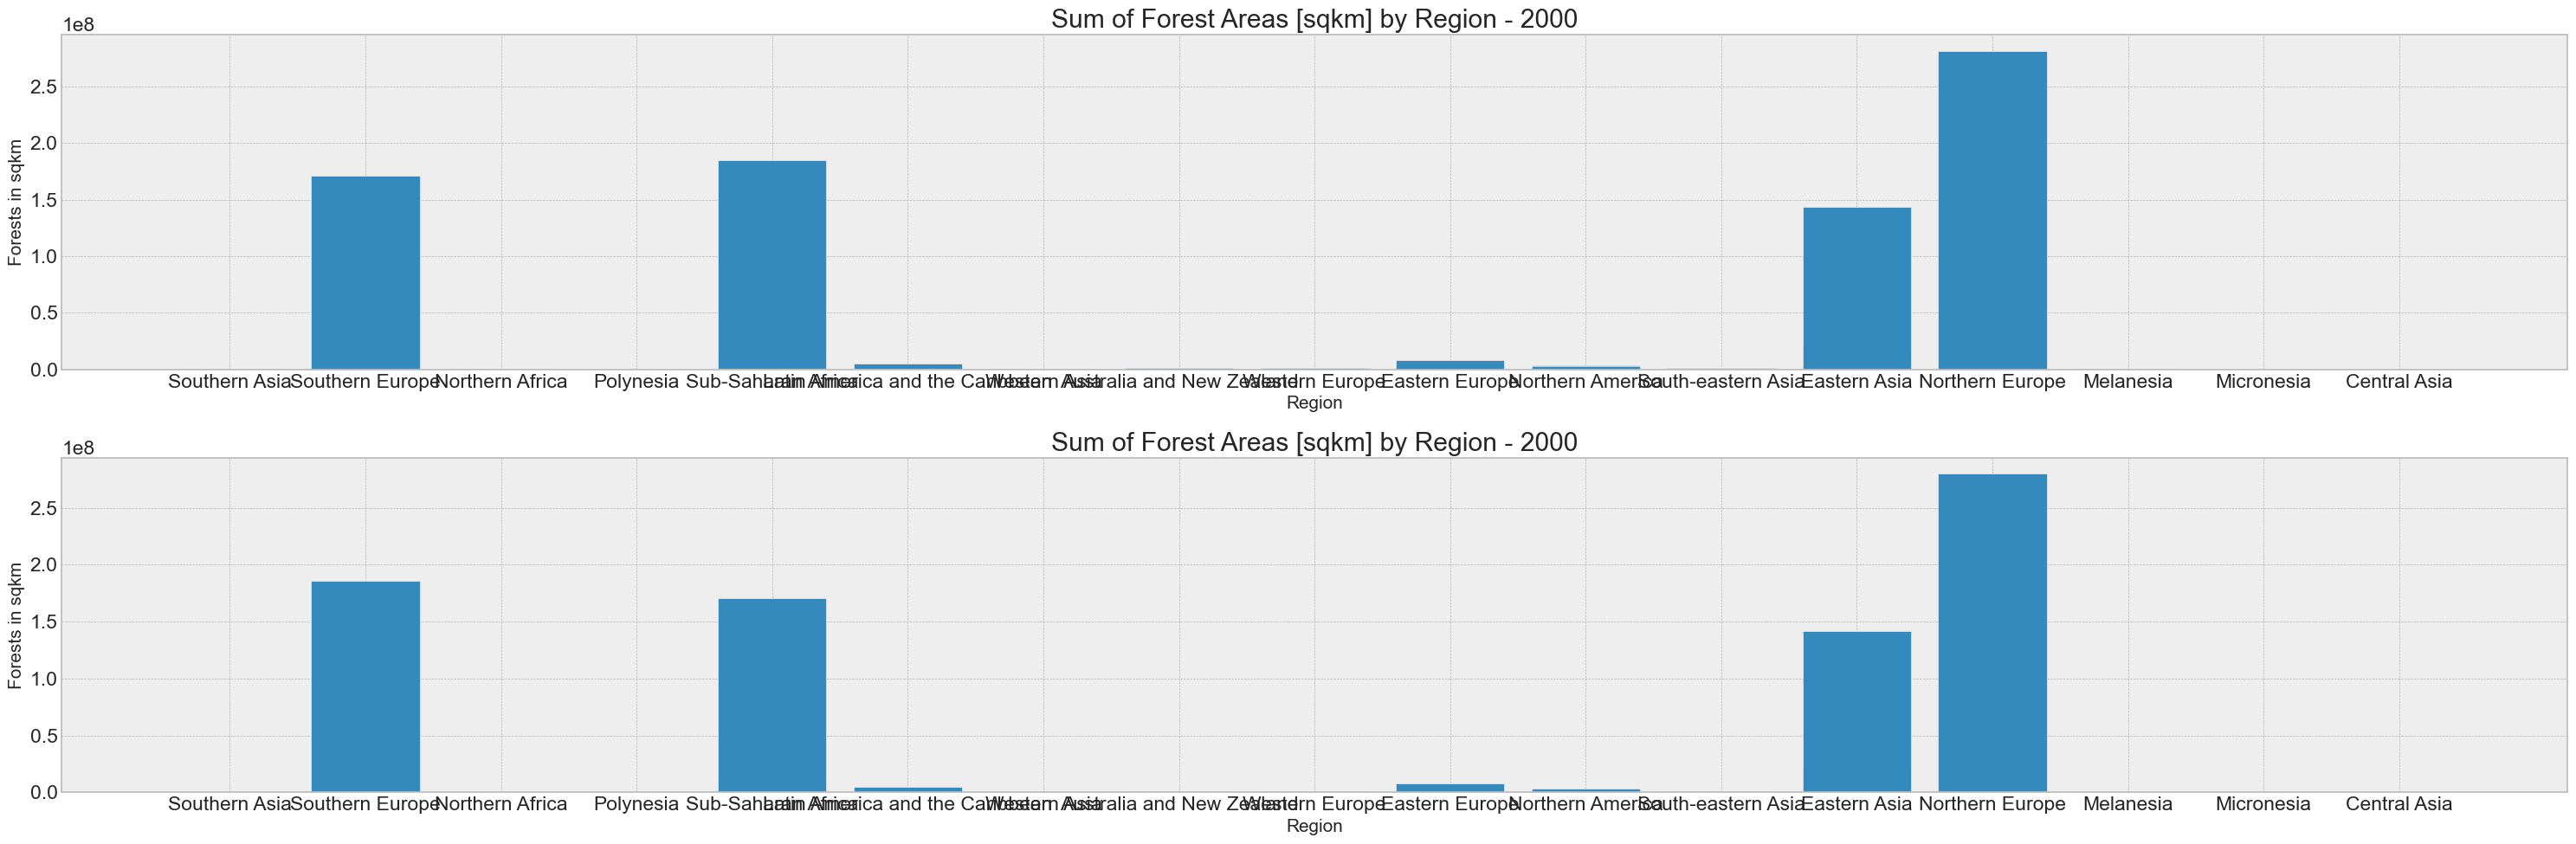

In [596]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

axes[0].bar(dataframe['region'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Forests in sqkm')
axes[0].set_title('Sum of Forest Areas [sqkm] by Region - 2000')

axes[1].bar(dataframe['region'], dataframe['2020_sqkm'])
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Forests in sqkm')
axes[1].set_title('Sum of Forest Areas [sqkm] by Region - 2000')

plt.tight_layout()

plt.show()

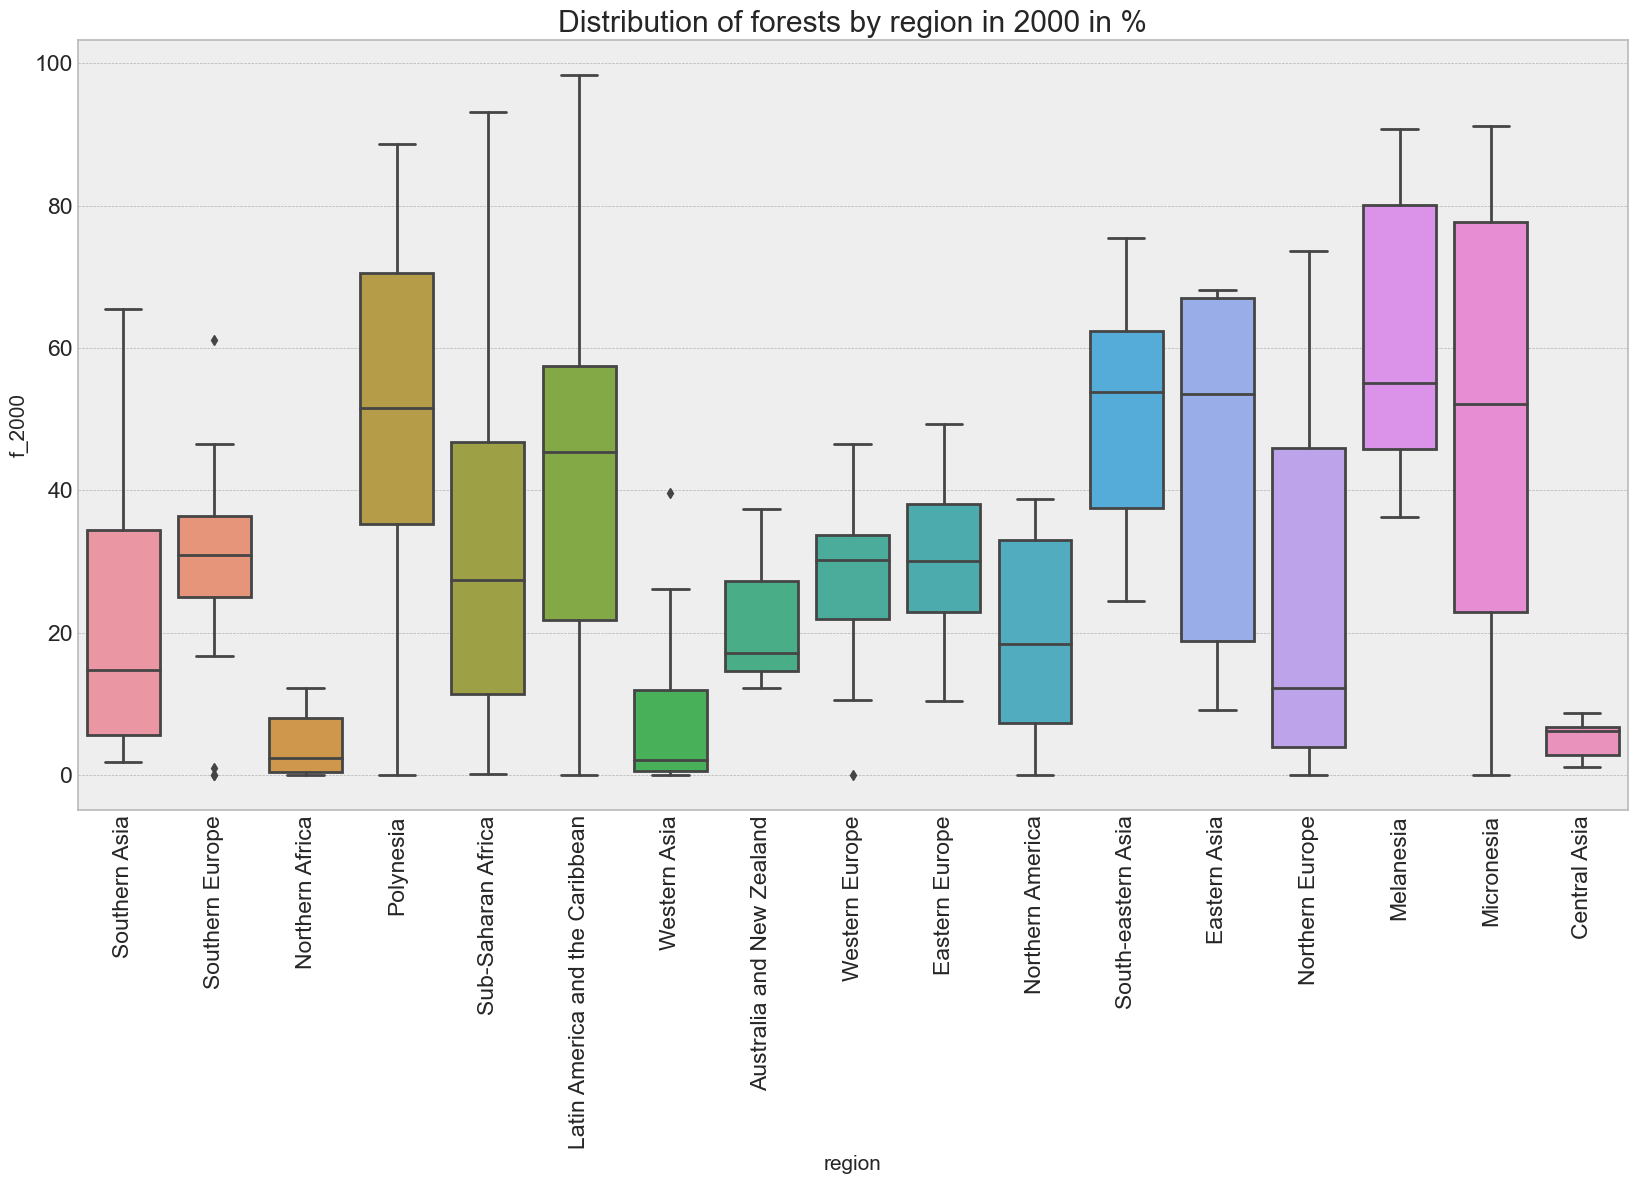

In [597]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = 'f_2000')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 in %")
plt.show()

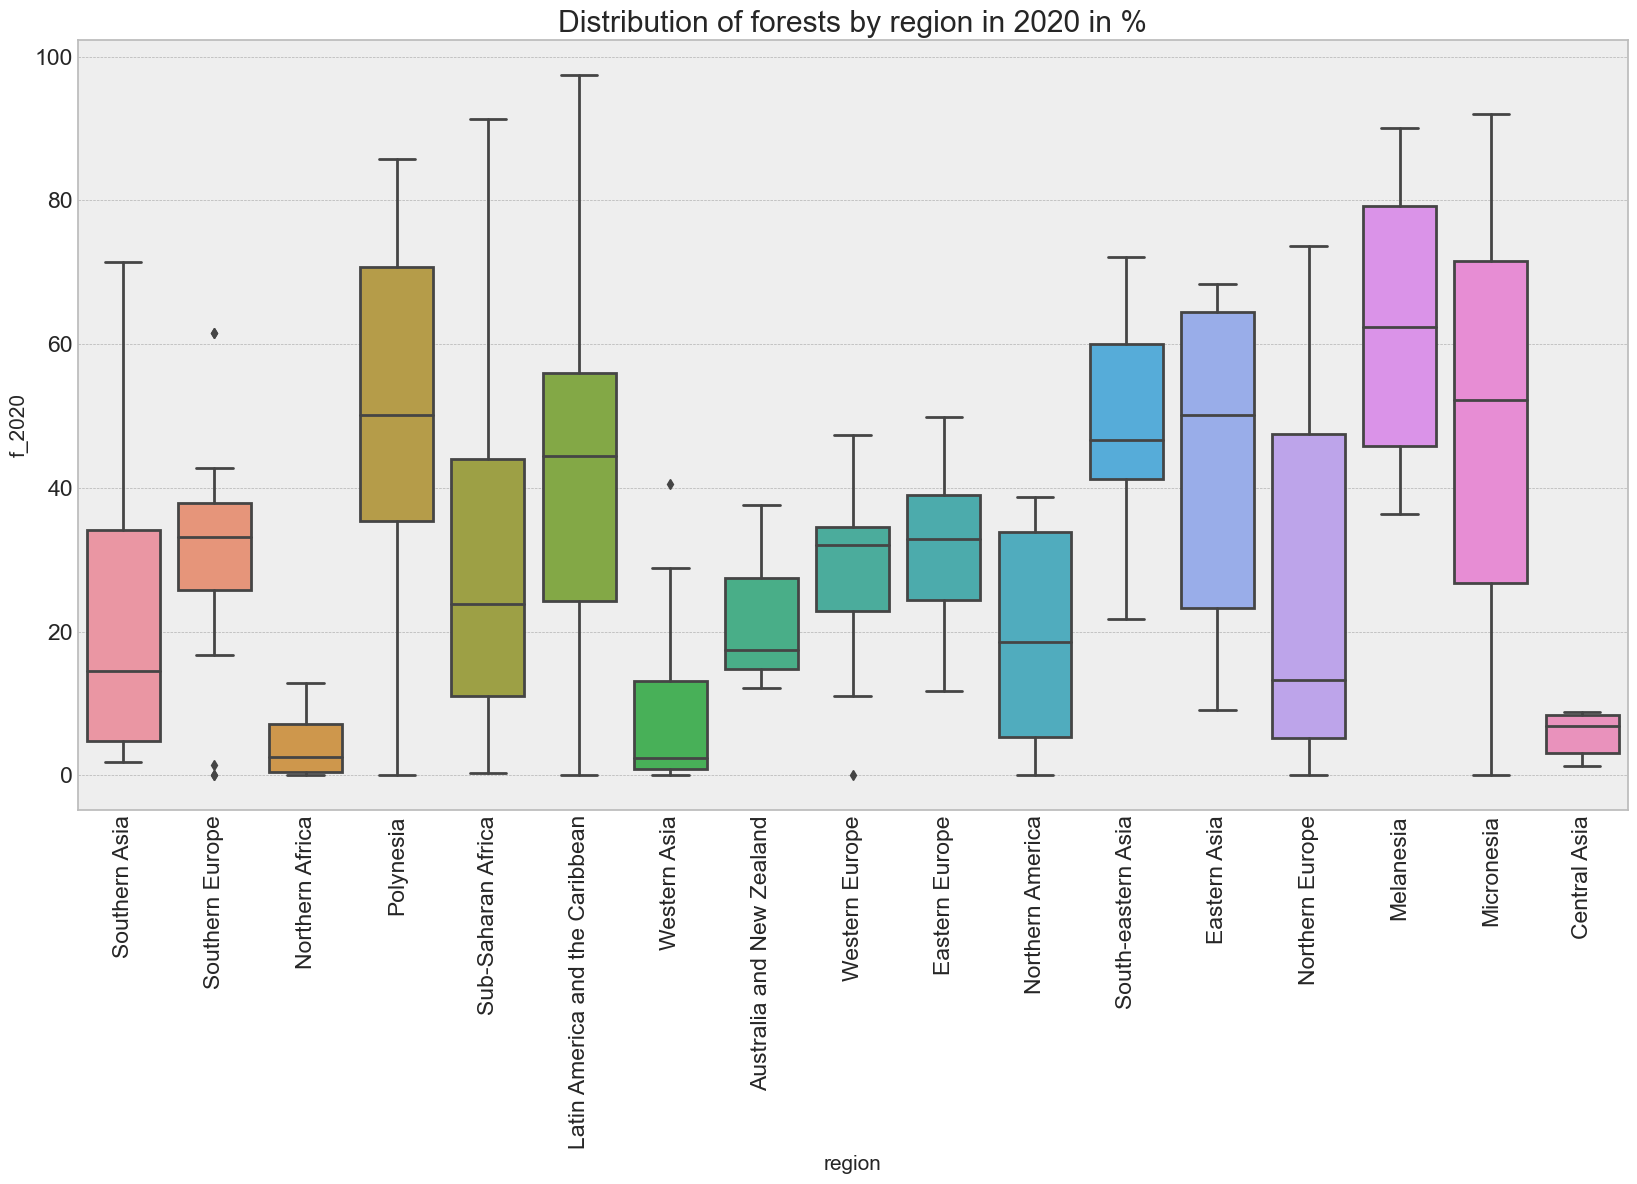

In [598]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = 'f_2020')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2020 in %")
plt.show()

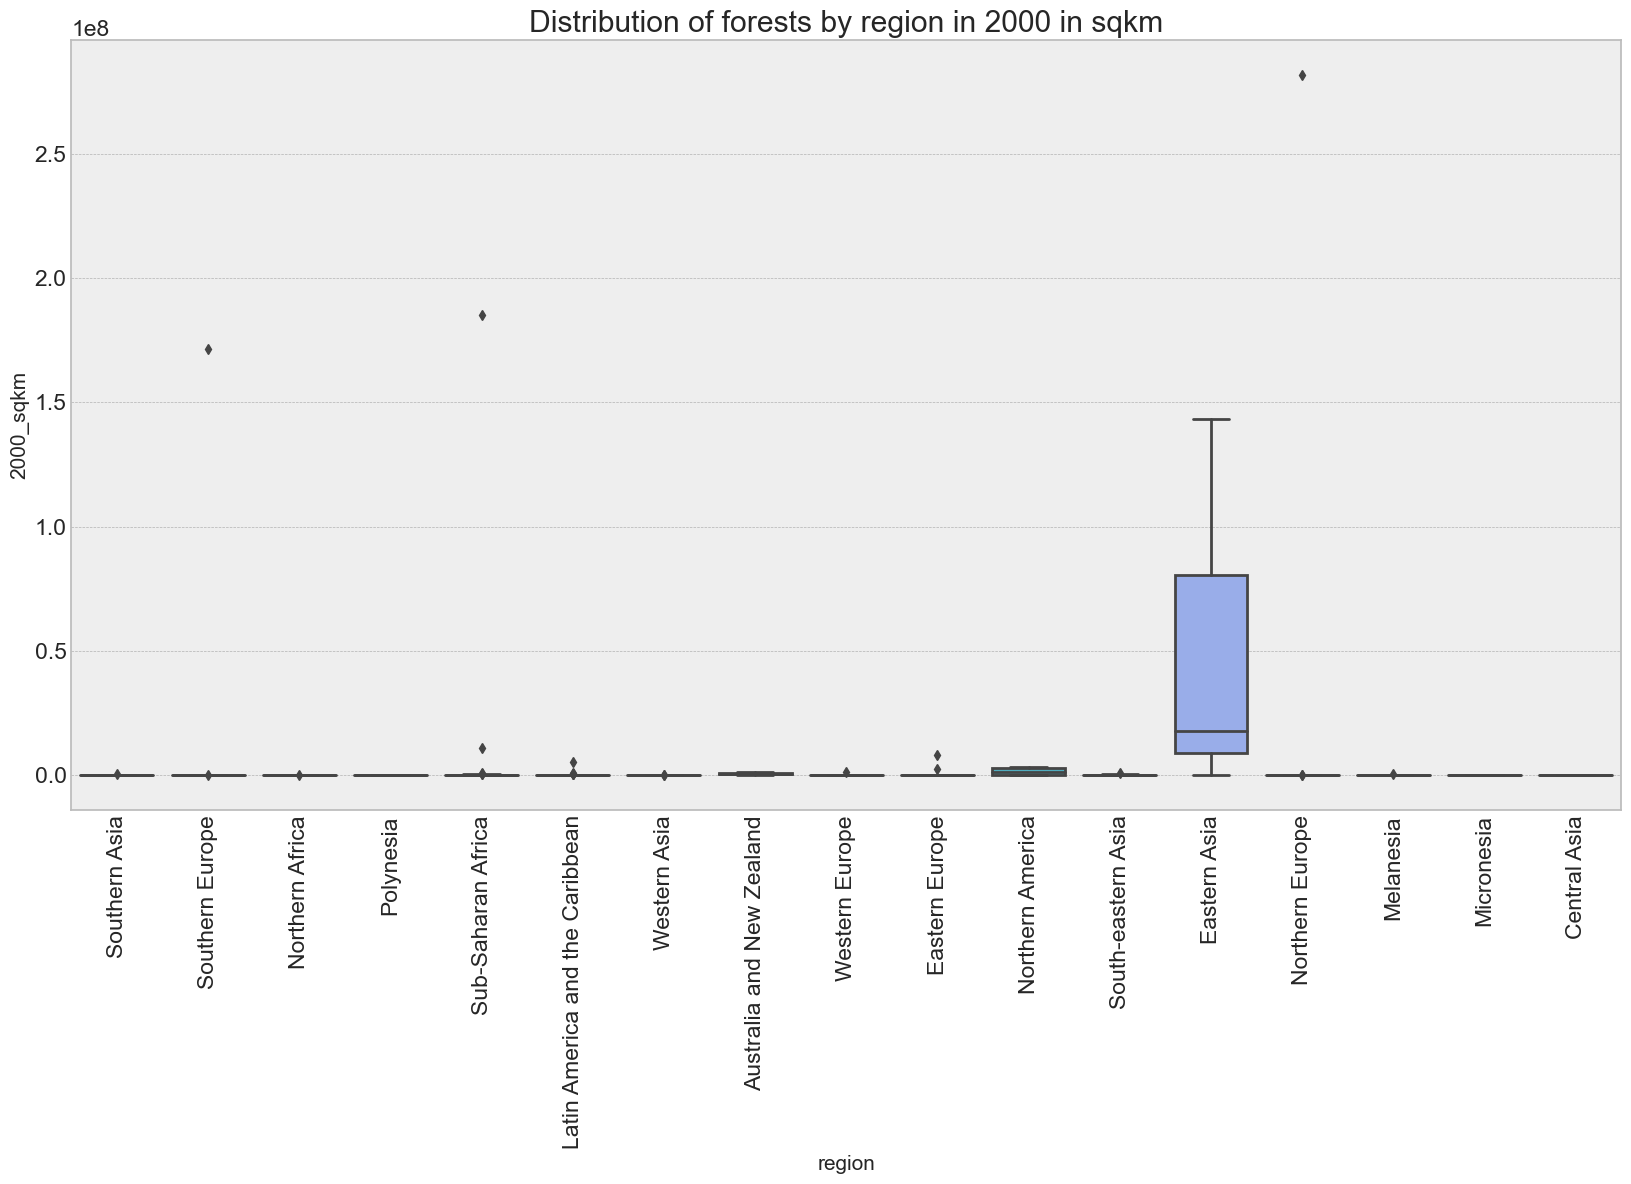

In [599]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 in sqkm")
plt.show()

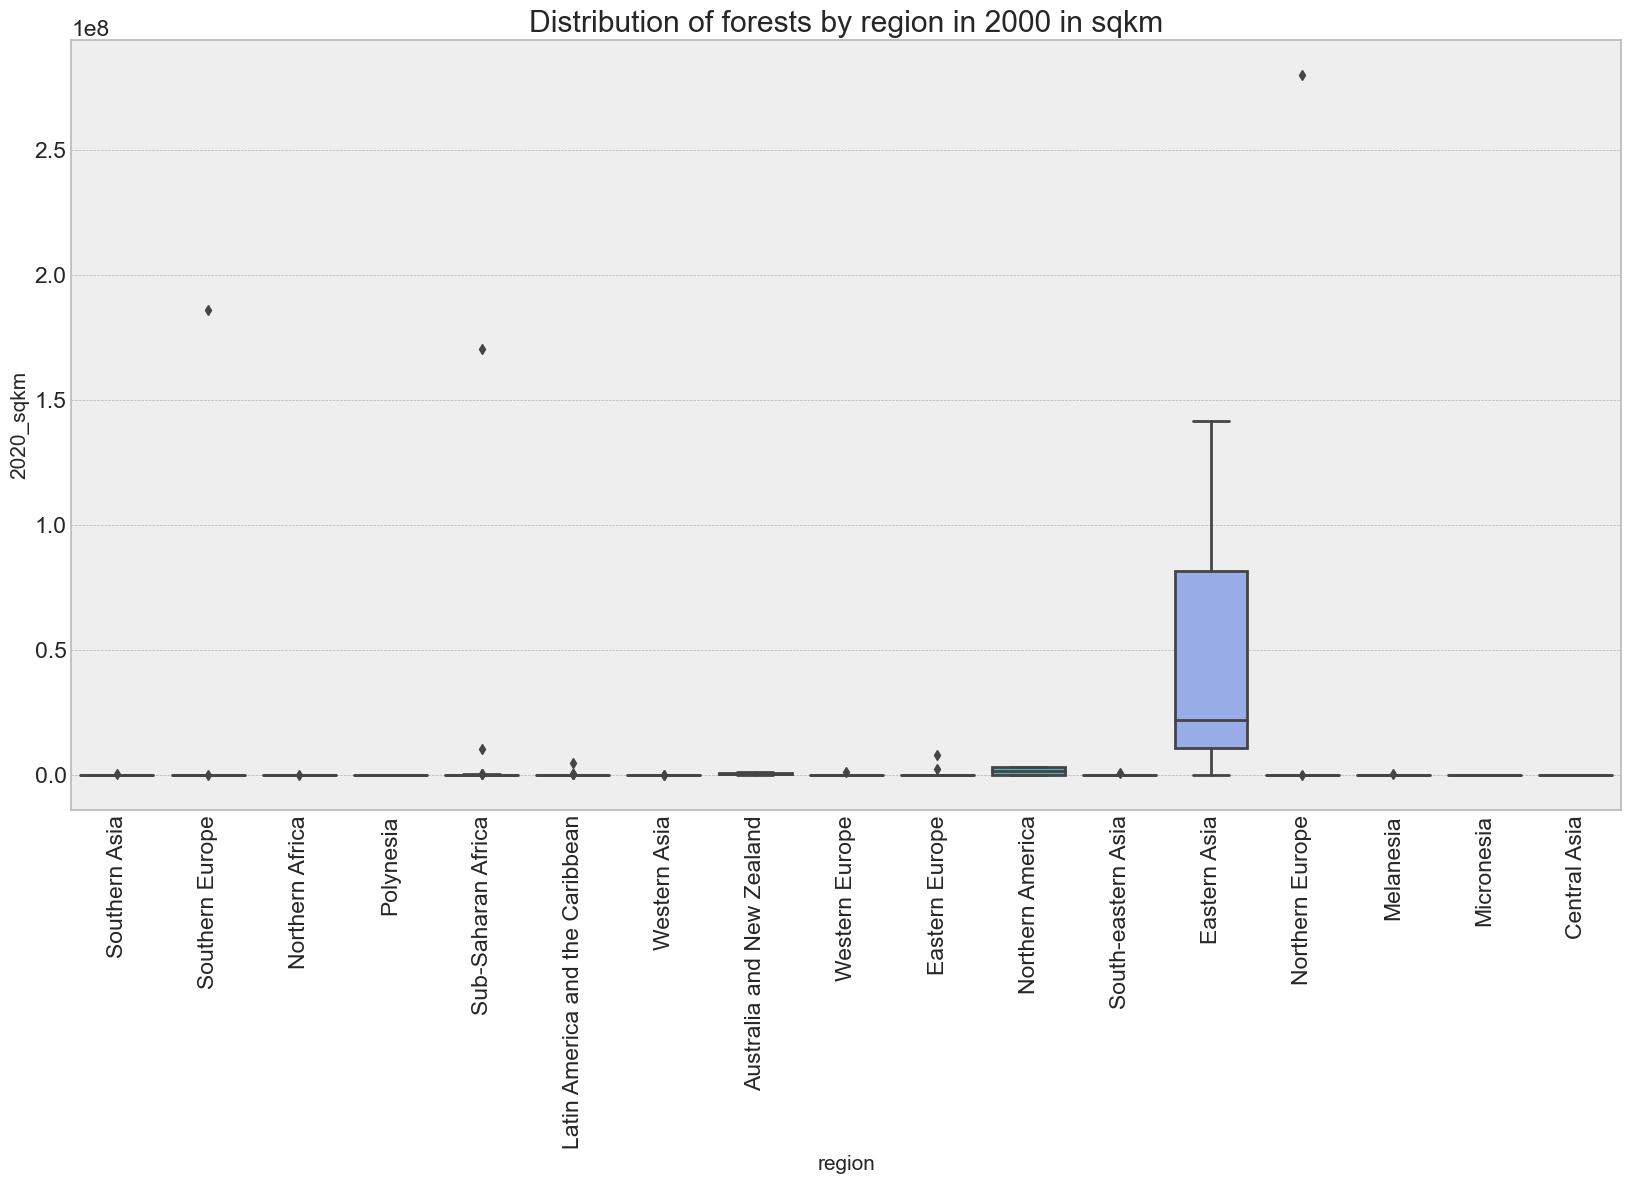

In [600]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = '2020_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 in sqkm")
plt.show()

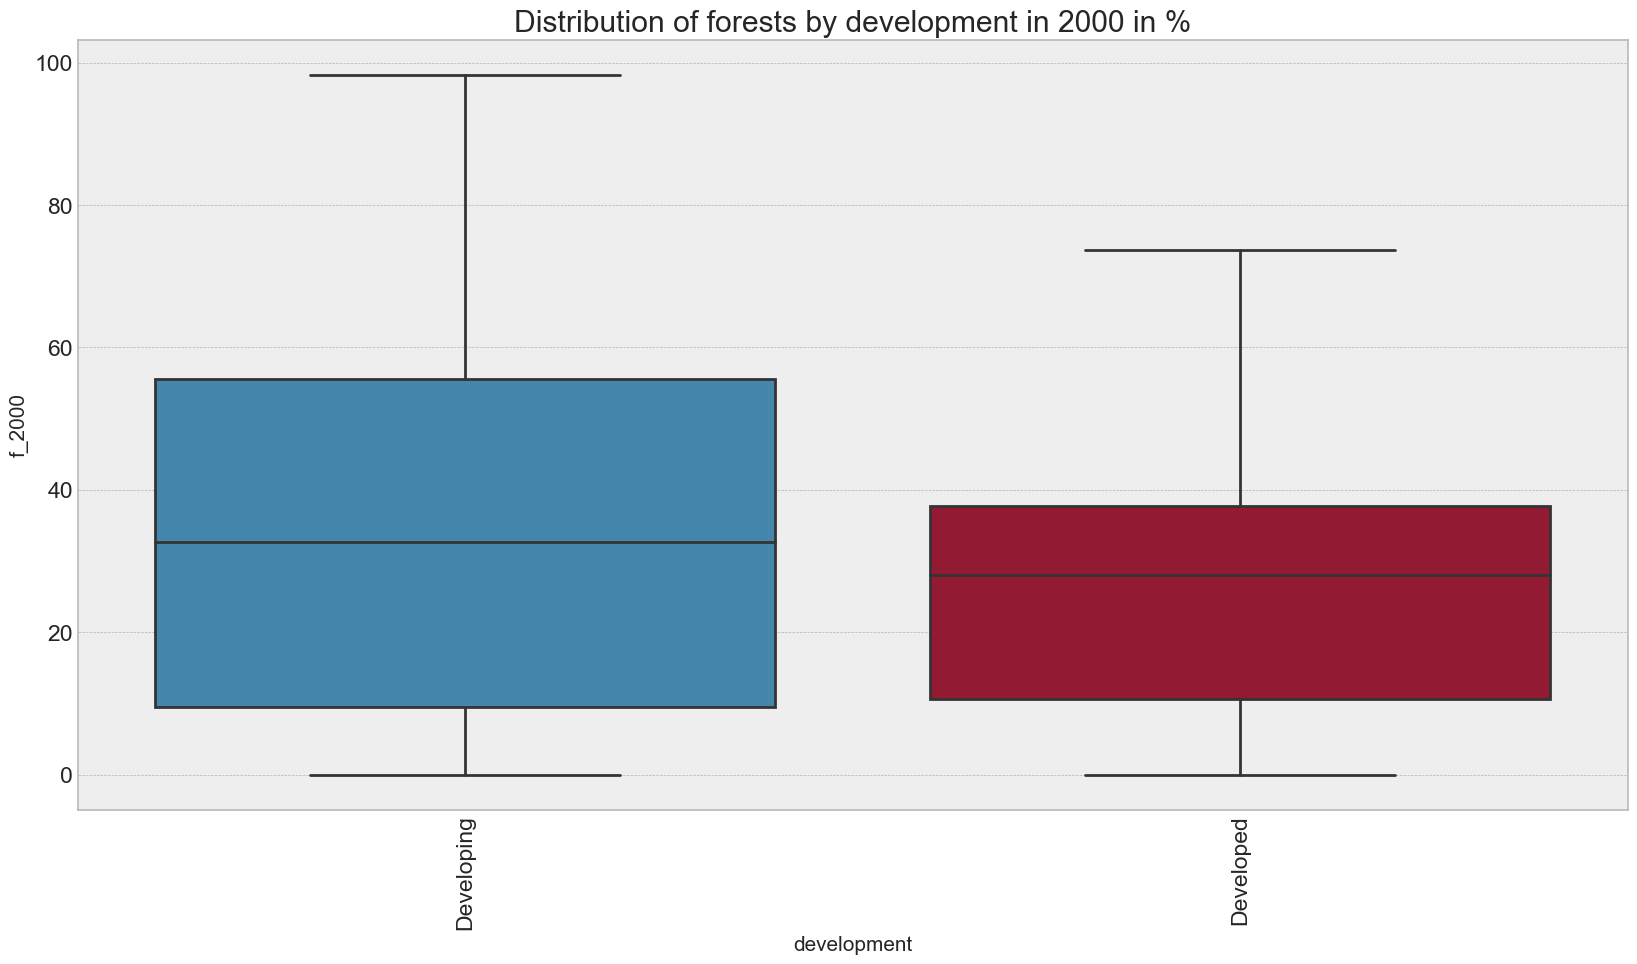

In [601]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = 'f_2000')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2000 in %")
plt.show()

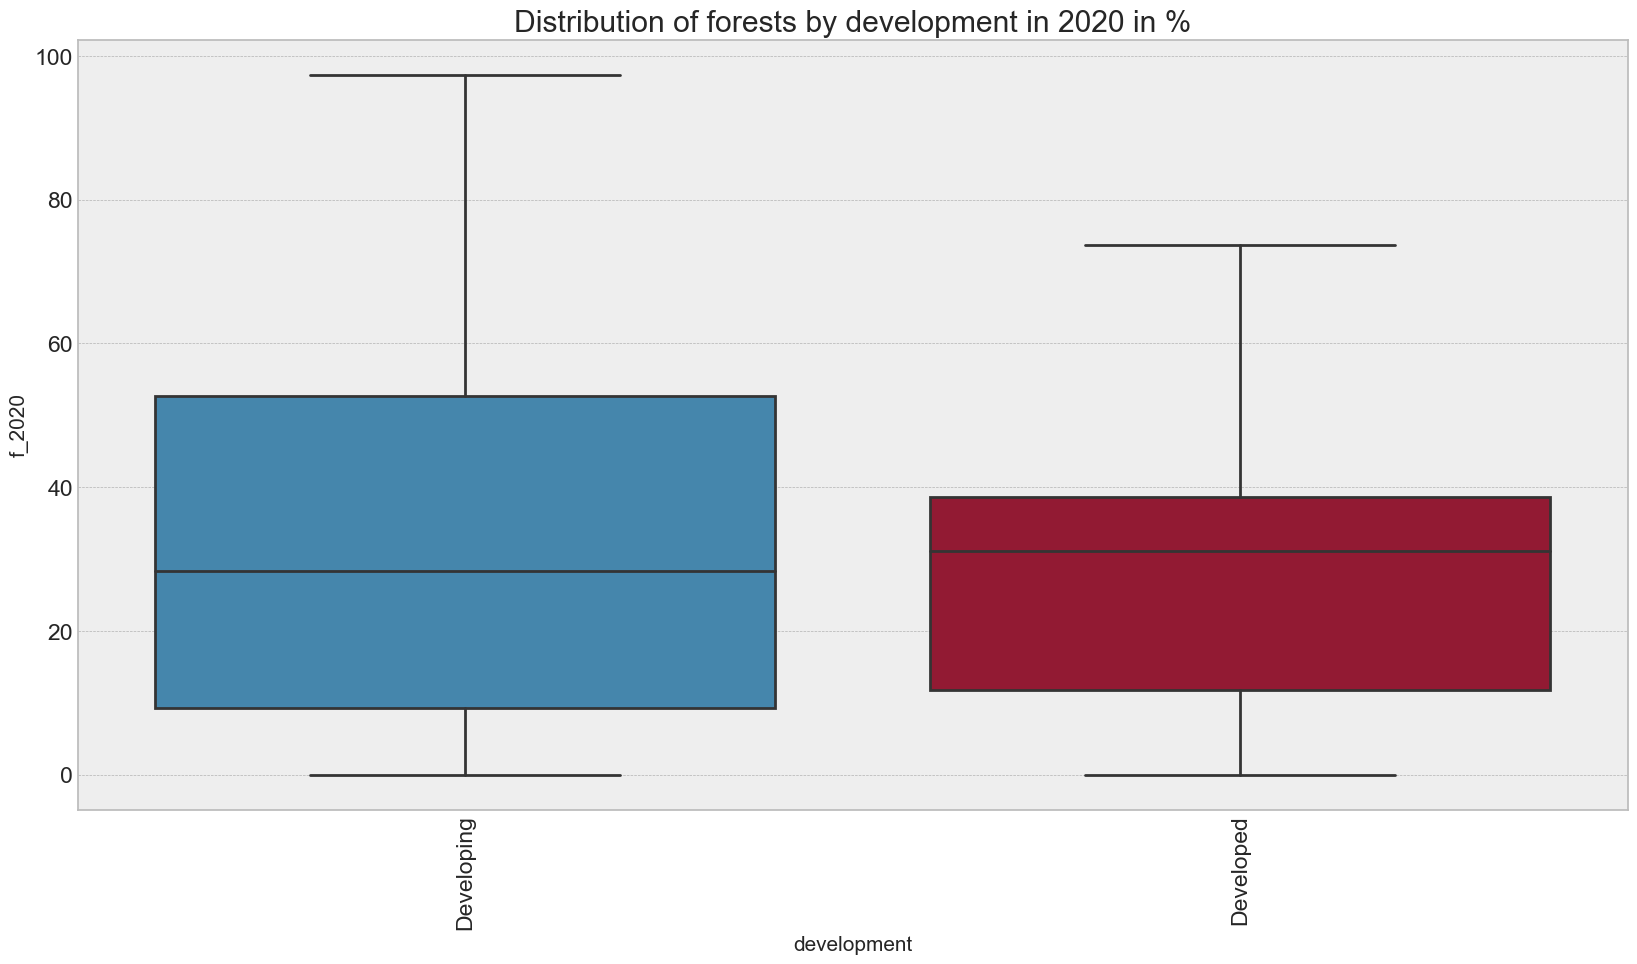

In [602]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = 'f_2020')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2020 in %")
plt.show()

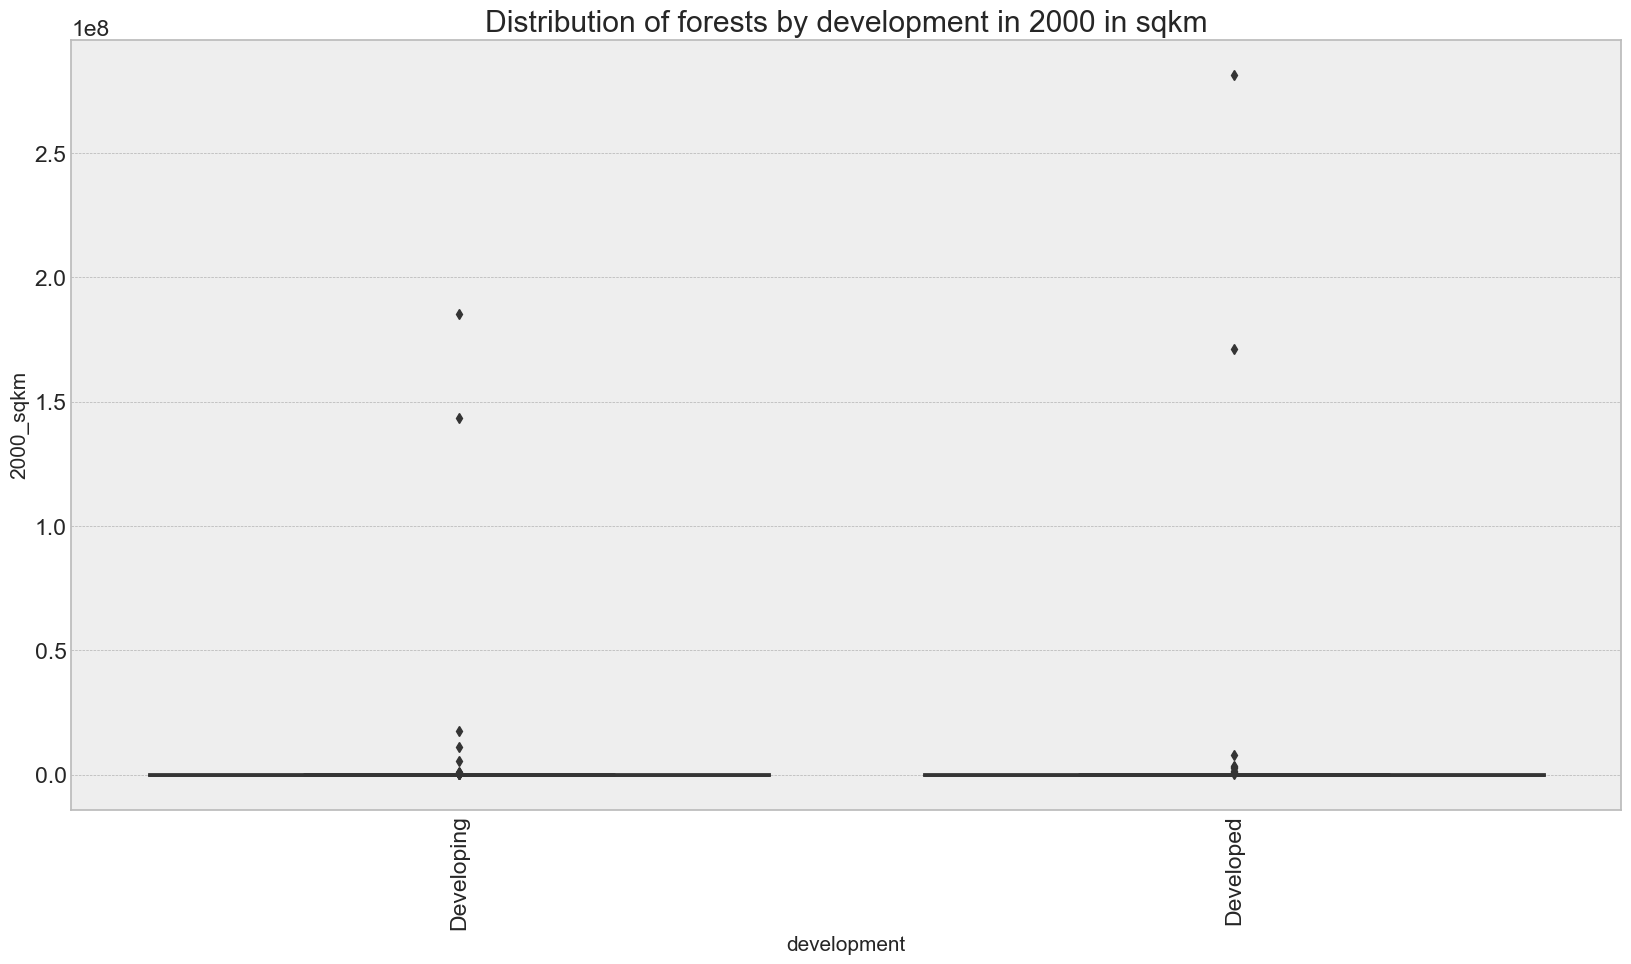

In [603]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2000 in sqkm")
plt.show()

No valid information about the distribuition by area over development. Analyse again after outliers cleaning or, after a segmentation from data by region:

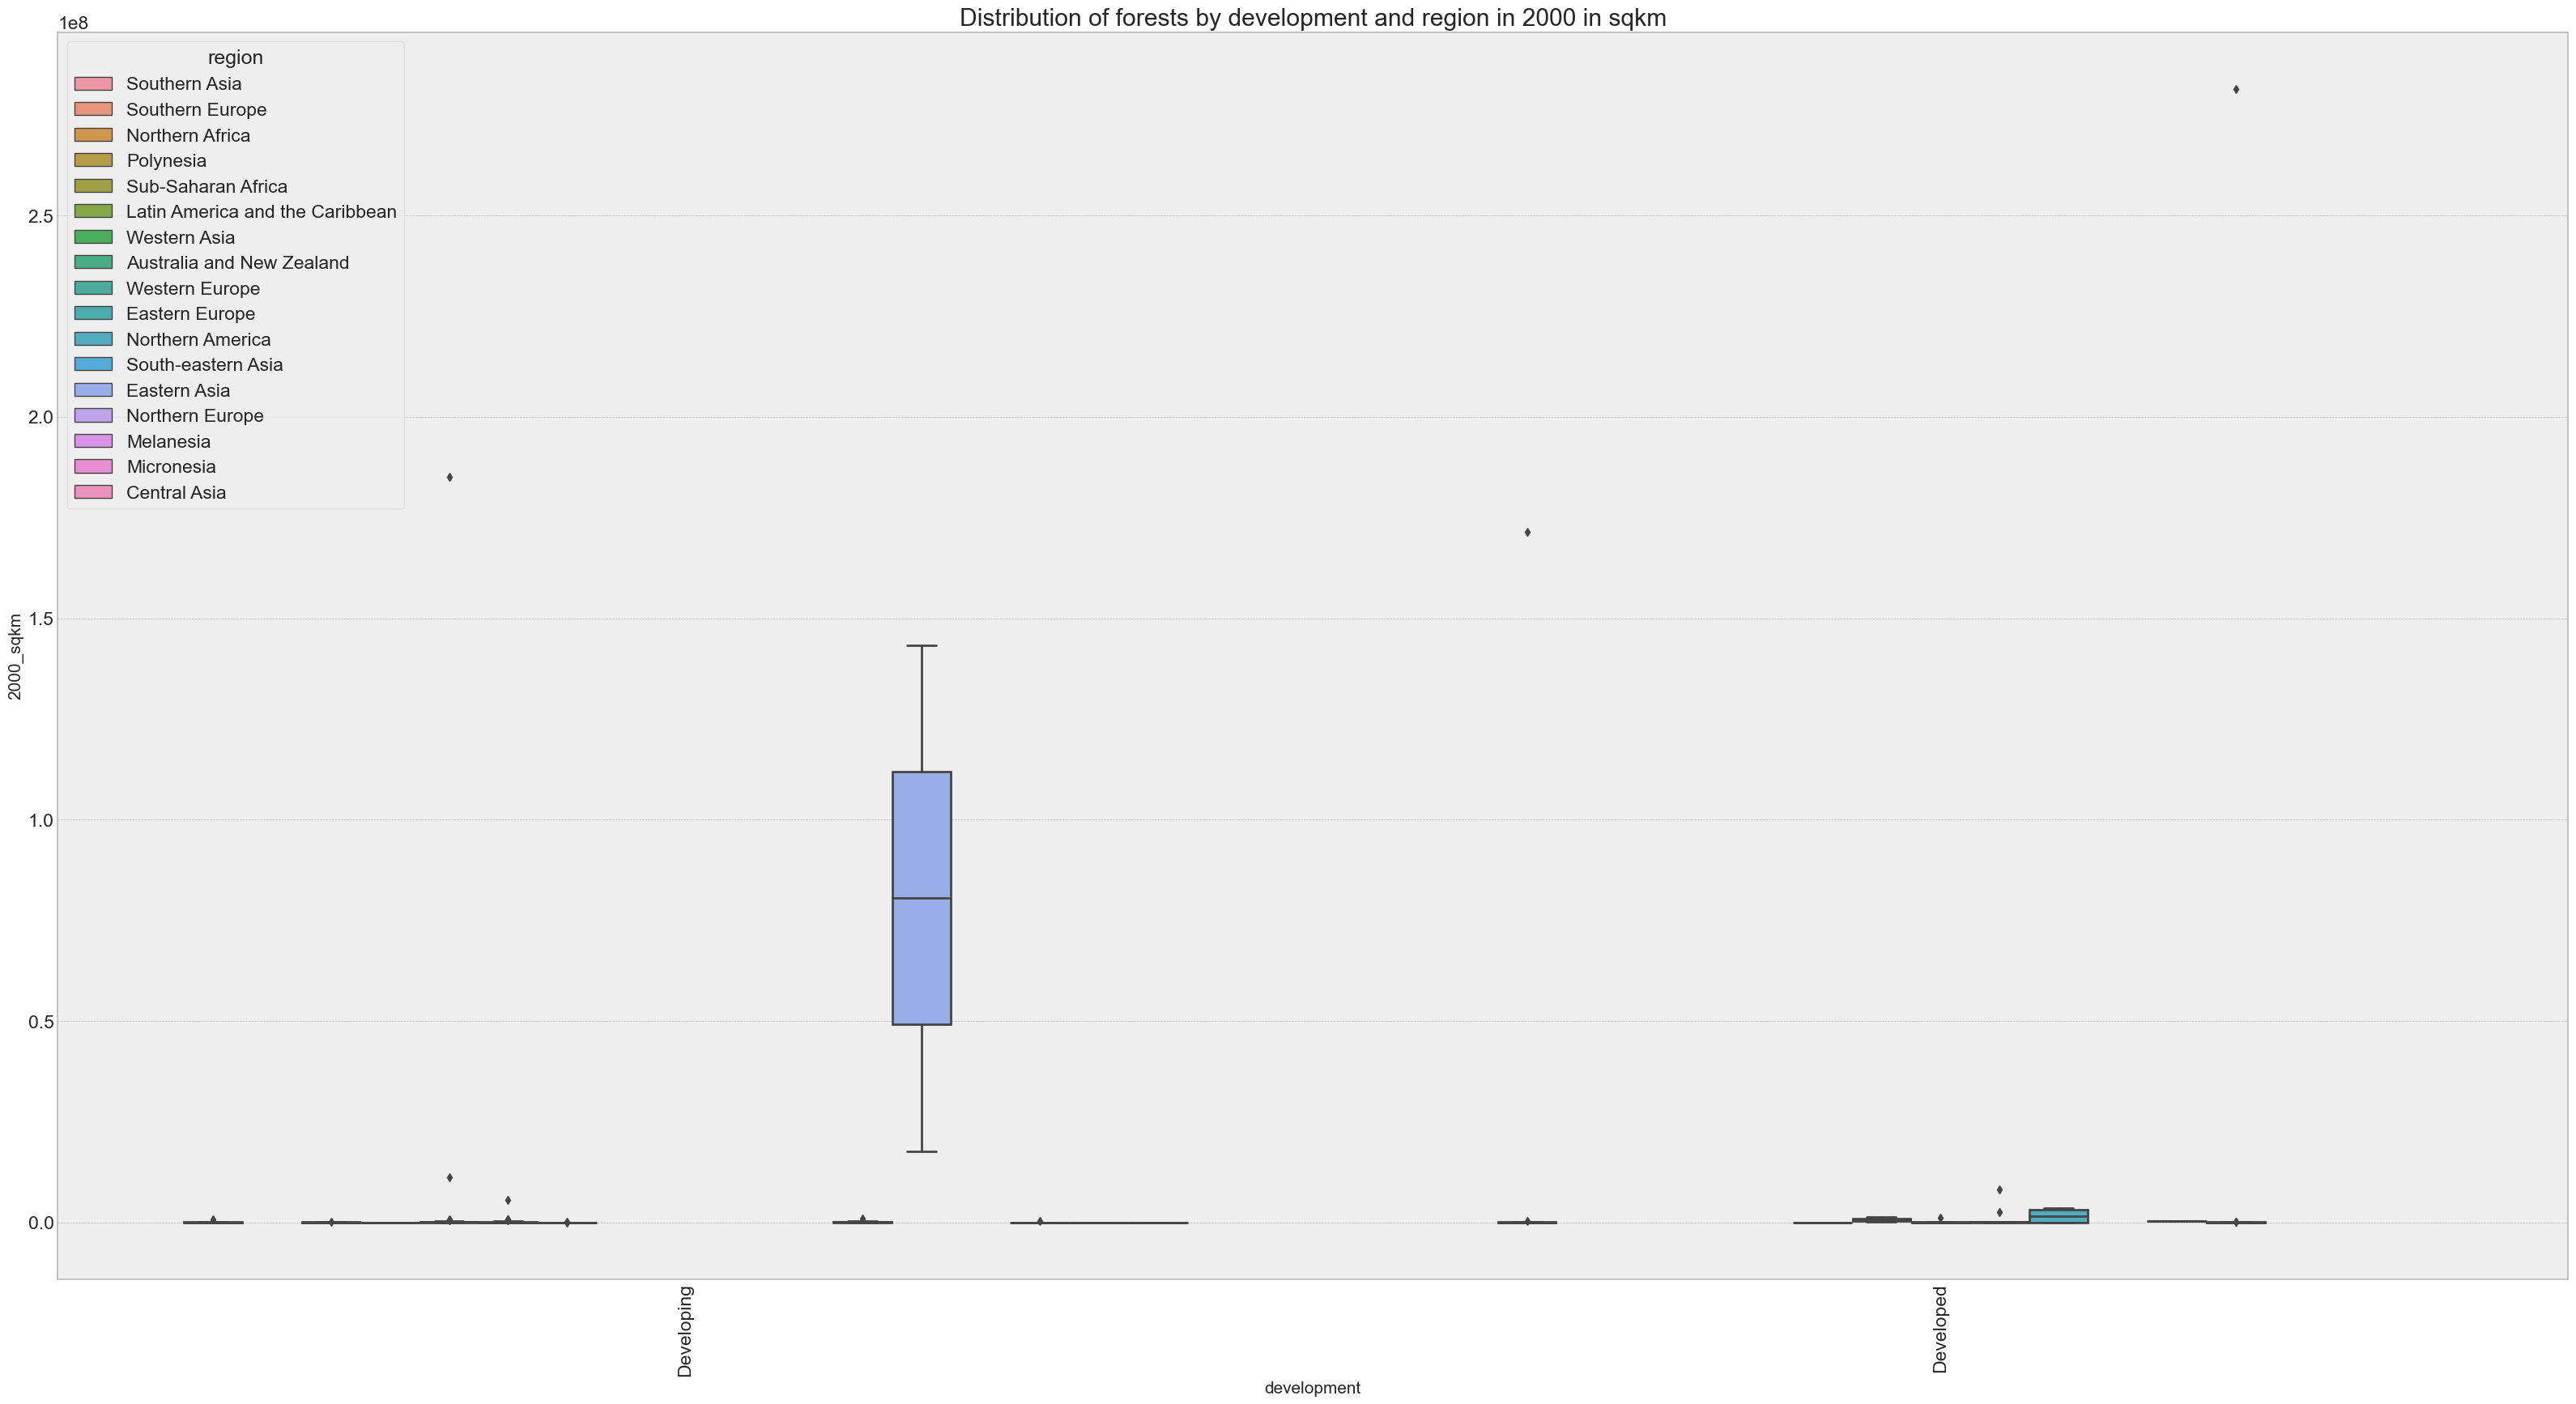

In [604]:
# Distribuition of forests by development
plt.figure(figsize=(40, 20))
sns.boxplot(data = dataframe, x='development', y = '2000_sqkm', hue = 'region')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development and region in 2000 in sqkm")
plt.show()

Again, with another segmentation, we can't identify a patter by the eastern asian distortion. So, removing this region for a better analysis from the rest of the world:

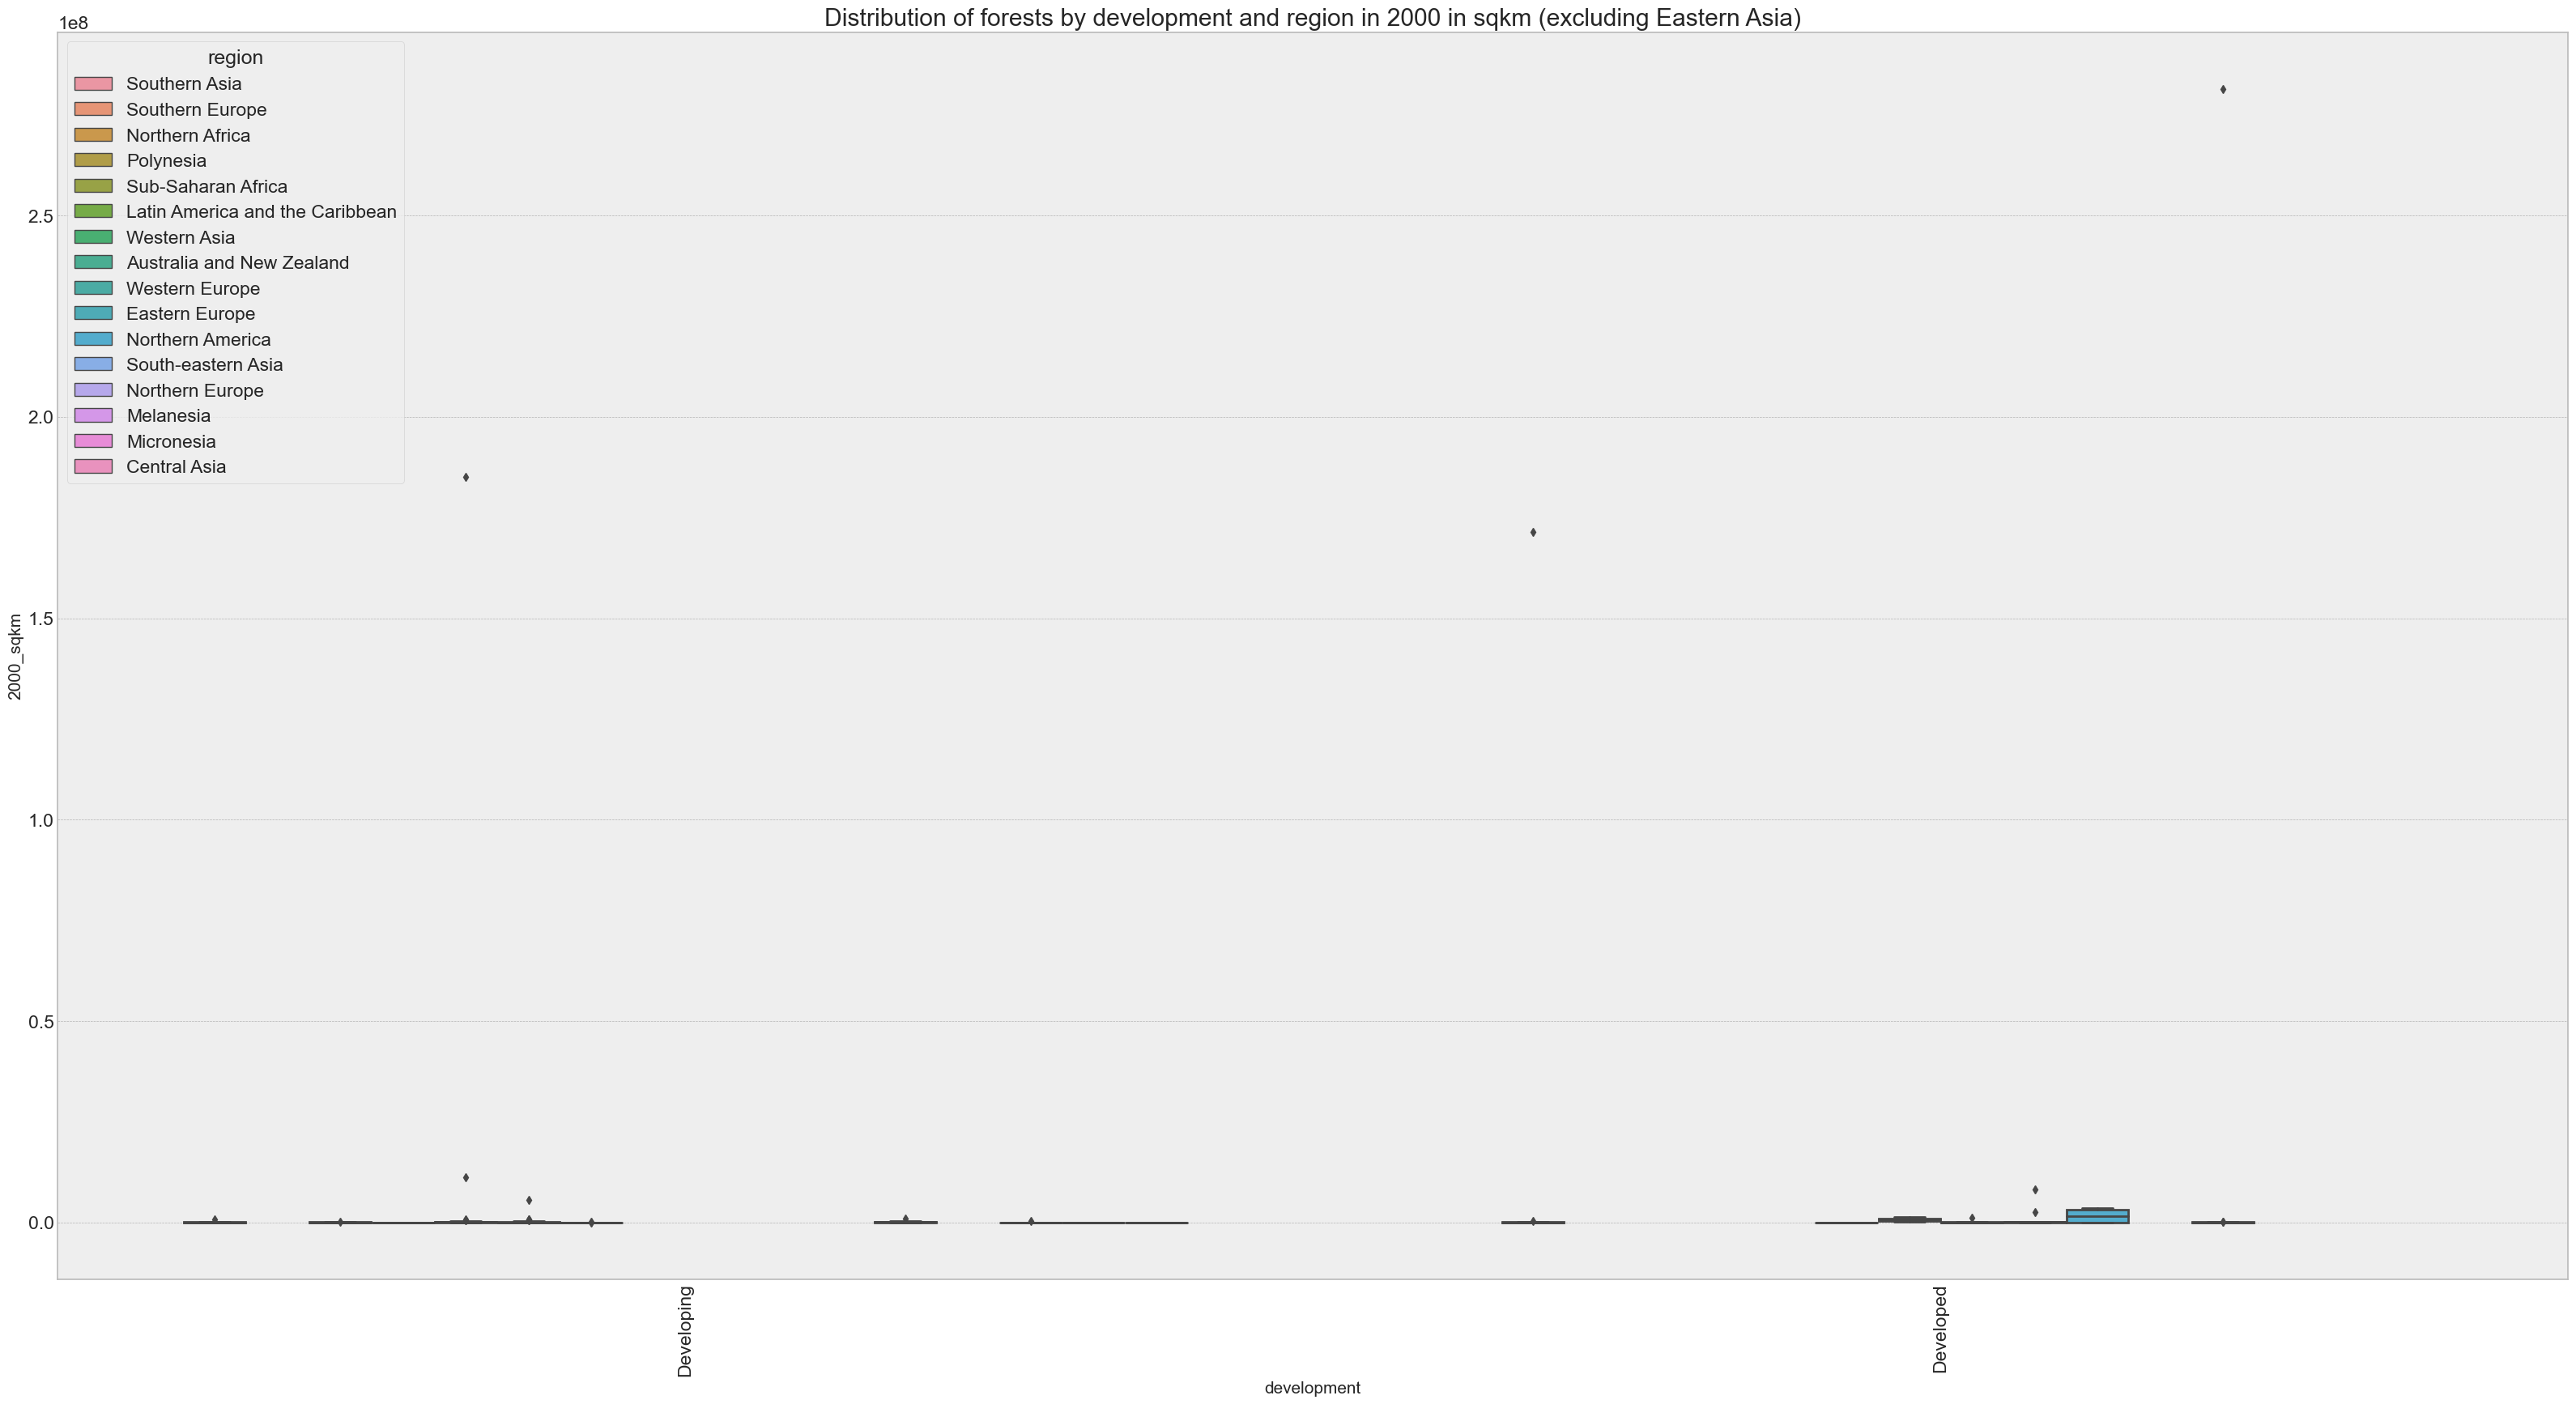

In [605]:
filtered_dataframe = dataframe[dataframe['region'] != 'Eastern Asia']

plt.figure(figsize=(40, 20))
sns.boxplot(data=filtered_dataframe, x='development', y='2000_sqkm', hue='region')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development and region in 2000 in sqkm (excluding Eastern Asia)")
plt.show()

Even excluding the Eastern Asia region, as we can see, the outliers doesn't allow us to see the distribuition.

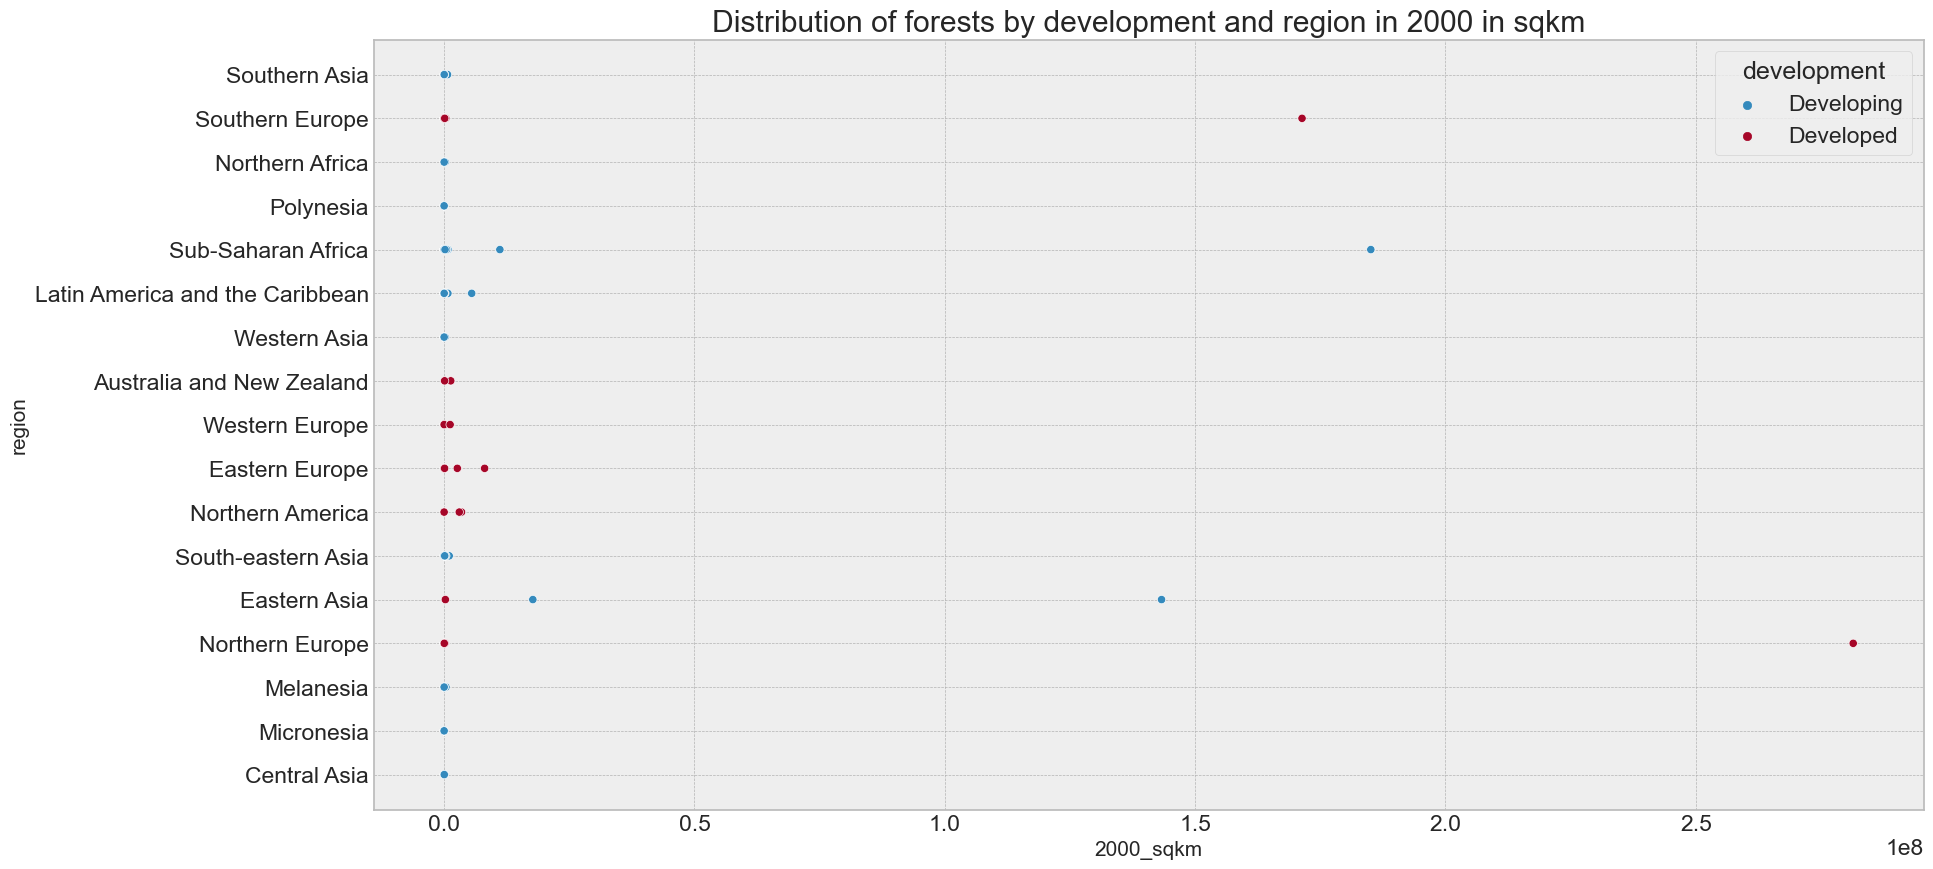

In [606]:
# Understanding the area distribuition of the forest by certains categorical factors with scatterplot:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = dataframe, x = '2000_sqkm', y = 'region', hue = 'development')
plt.title("Distribution of forests by development and region in 2000 in sqkm")
plt.show()

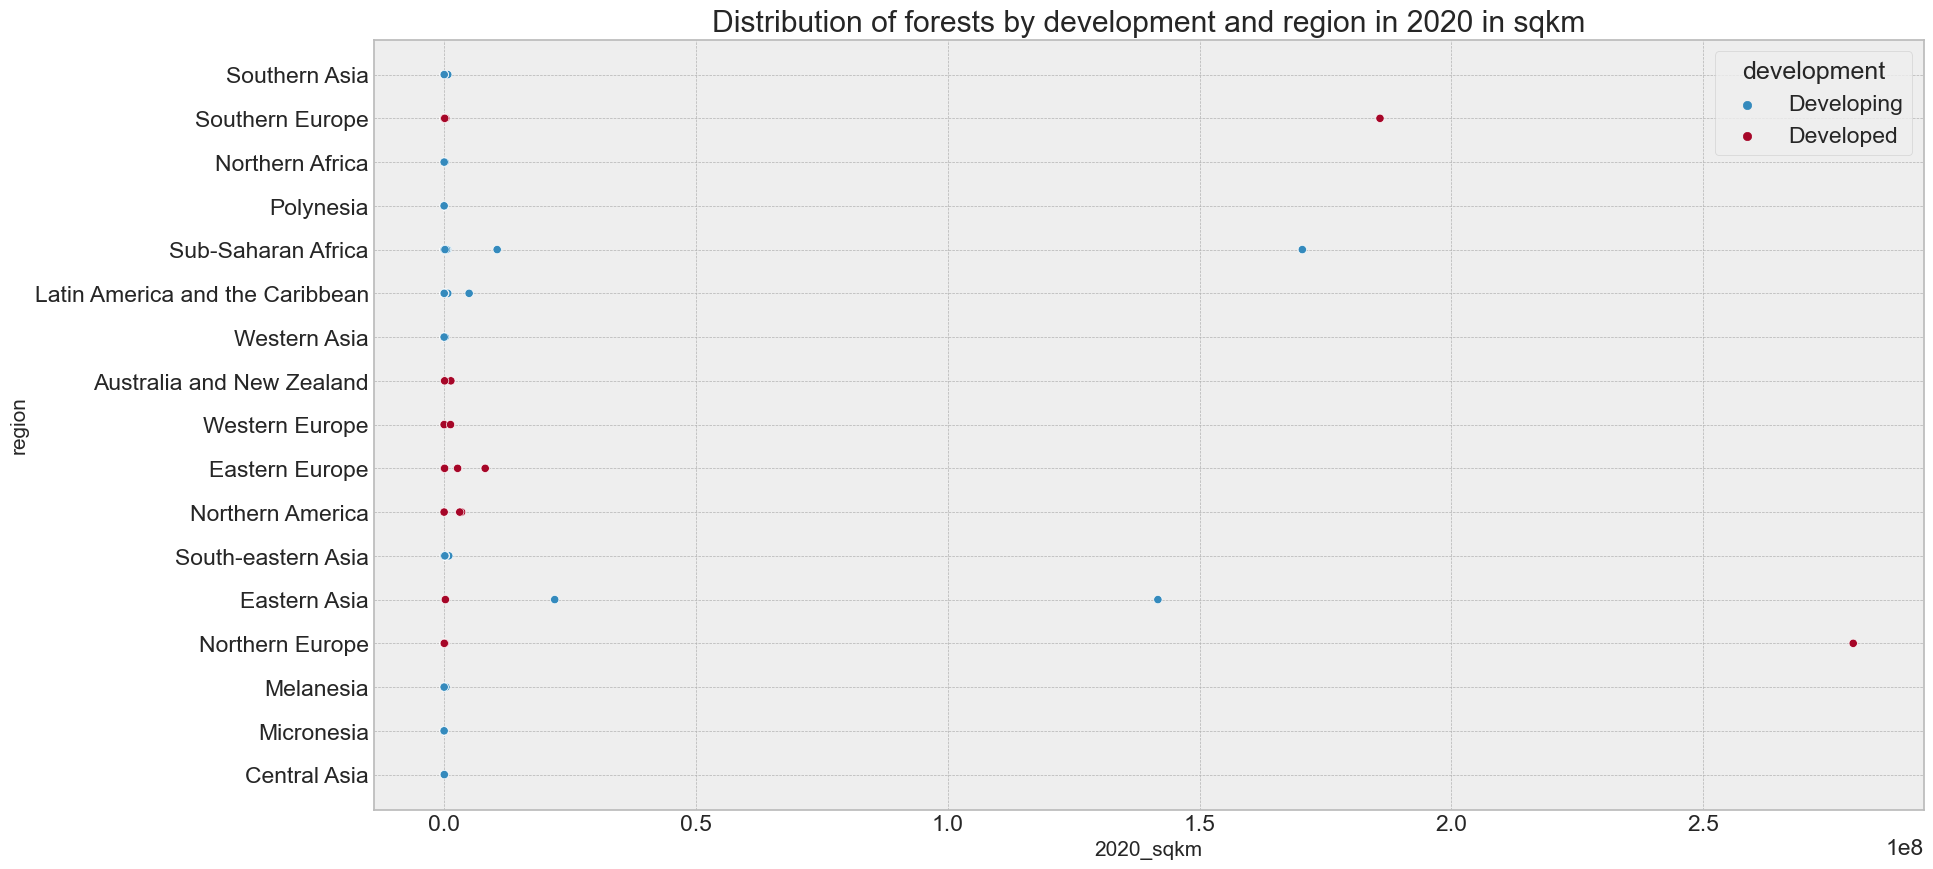

In [631]:
# Understanding the area distribuition of the forest by certains categorical factors with scatterplot:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = dataframe, x = '2020_sqkm', y = 'region', hue = 'development')
plt.title("Distribution of forests by development and region in 2020 in sqkm")
plt.show()

### KDE analysis:

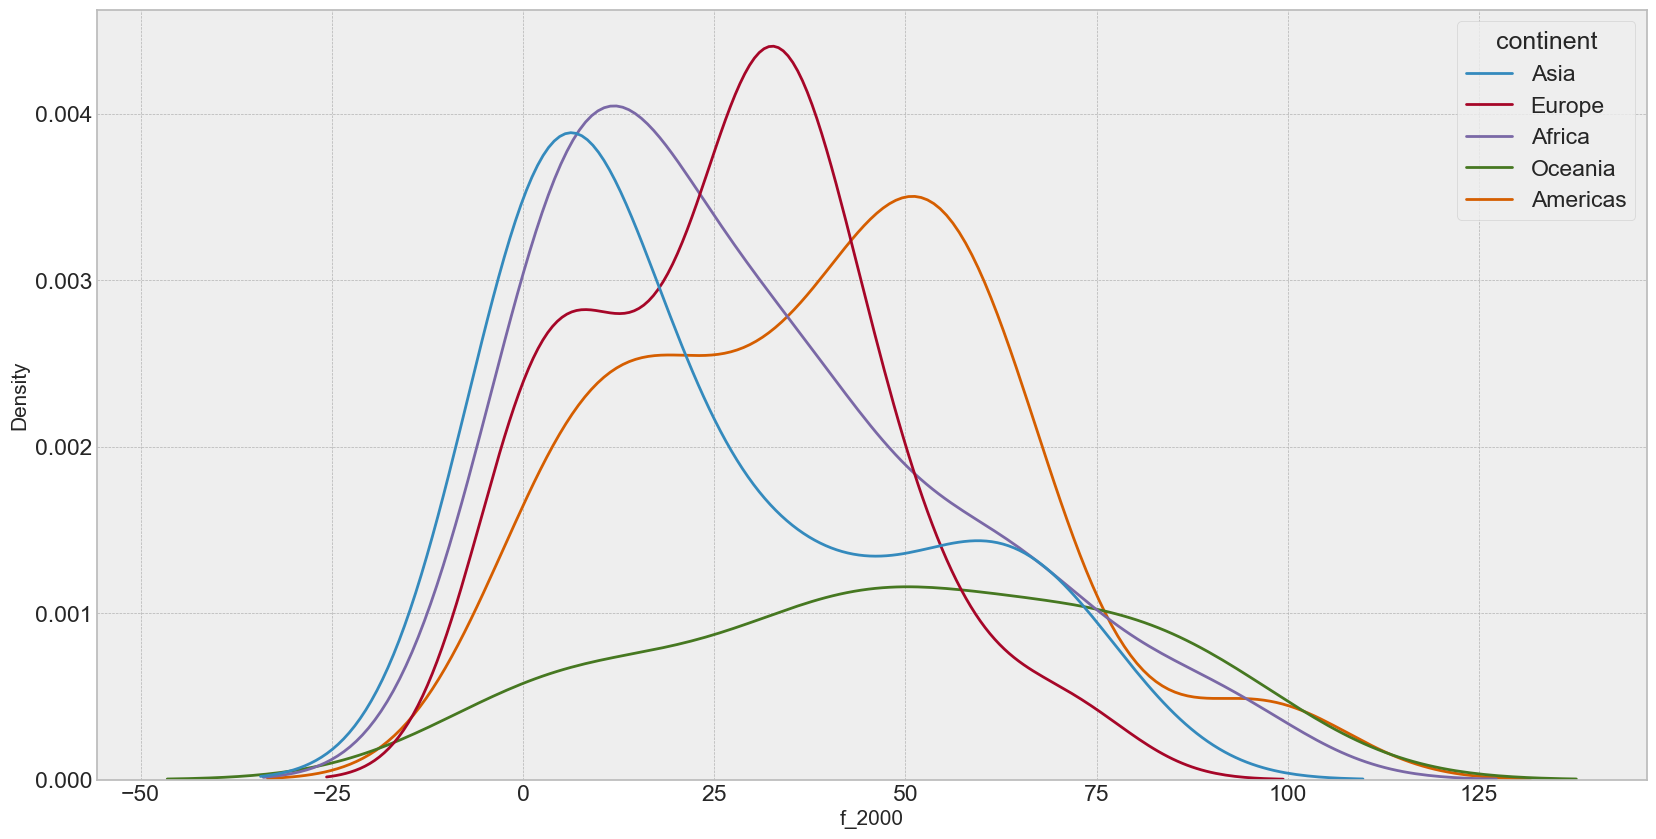

In [607]:
# Analysing the distribuition by continents looking for a pattern with KDE (Kernel Density Estimate):
plt.figure(figsize=(20, 10))
sns.kdeplot(data = dataframe, x = 'f_2000', hue = 'continent')
plt.show()

### Maximum and minimum area percent

Maximum:

In [608]:
# Country with the highest percentage of area in 2000:
max_f_2000 = dataframe.loc[df['f_2000'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2000:", max_f_2000)

Country with the highest percentage of area in 2000: Suriname


In [609]:
max_f_2000_value = dataframe['f_2000'].loc[dataframe['country_name'] == max_f_2000]

max_f_2000_value = max_f_2000_value.values[0]

print('Country with the highest percentage of area in 2000:', max_f_2000,', with the percent: ',max_f_2000_value)

Country with the highest percentage of area in 2000: Suriname , with the percent:  98.3


In [610]:
# Country with the highest percentage of area in 2020:
max_f_2020 = dataframe.loc[df['f_2020'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2020:", max_f_2020)

Country with the highest percentage of area in 2020: Suriname


Suriname kept being the country with the highest percent area of forest. Let's check this number:

In [611]:
max_f_2020_value = dataframe['f_2020'].loc[dataframe['country_name'] == max_f_2020]

max_f_2020_value = max_f_2020_value.values[0]

print('Country with the highest percentage of area in 2020:', max_f_2020,', with the percent: ',max_f_2020_value)

Country with the highest percentage of area in 2020: Suriname , with the percent:  97.4


In [612]:
filtered_dataframe = dataframe[dataframe['f_2000'] > 0]

min_f_2000 = filtered_dataframe.loc[filtered_dataframe['f_2000'].idxmin(), 'country_name']

print("Country with the lowest percentage of area in 2000:", min_f_2000)

Country with the lowest percentage of area in 2000: Egypt


Let's check it out:

In [613]:
min_f_2000_row = filtered_dataframe[filtered_dataframe['f_2000'] == filtered_dataframe['f_2000'].min()]

min_f_2000_country = min_f_2000_row['country_name'].values[0]

min_f_2000_value = min_f_2000_row['f_2000'].values[0]

print('Country with the lowest percentage of area in 2000:', min_f_2000_country, ', with the percent:', min_f_2000_value)

Country with the lowest percentage of area in 2000: Egypt , with the percent: 0.1


In [614]:
# Country with the lowest percentage of area in 2020:
filtered_dataframe = dataframe[dataframe['f_2020'] > 0]

min_f_2020 = filtered_dataframe.loc[filtered_dataframe['f_2020'].idxmin(), 'country_name']

print("Country with the lowest percentage of area in 2020:", min_f_2020)

Country with the lowest percentage of area in 2020: Faroe Islands


Let's check it out:

In [615]:
min_f_2020_value = filtered_dataframe['f_2020'].loc[filtered_dataframe['country_name'] == min_f_2020]

min_f_2020_value = min_f_2020_value.values[0]

print('Country with the highest percentage of area in 2020:', min_f_2020,', with the percent: ',min_f_2020_value)

Country with the highest percentage of area in 2020: Faroe Islands , with the percent:  0.1


In [616]:
# Creating a dataframe with the results:

extreme_values = pd.DataFrame({'Year': [2000, 2020],
                   'Highest Forests Countries': [max_f_2000, max_f_2000],
                   'Highest Forests (%)' : [max_f_2000_value, max_f_2020_value],
                   'Lowest Forests Countries': [min_f_2000, min_f_2000],
                   'Lowest Forests (%)' : [min_f_2000_value, min_f_2020_value]
                   })

extreme_values

,Year,Highest Forests Countries,Highest Forests (%),Lowest Forests Countries,Lowest Forests (%)
0,2000,Suriname,98.3,Egypt,0.1
1,2020,Suriname,97.4,Egypt,0.1


## Correlation between the columns

To analyze the correlation between numerical and categorical variables, we will transform the categorical variables into numerical format by assigning an ID to each new value in the categories using the label encoding method.

'Label encoding is a technique used to transform categorical data into numerical format. It assigns a unique integer to each category in the column, effectively converting non-numeric labels into numeric representations. This allows machine learning models to process and analyze categorical features more effectively since many algorithms rely on numerical inputs. However, it's important to note that label encoding should be used with caution, especially with ordinal variables, as assigning numerical values to categories may introduce unintended ordinal relationships that could impact the model's performance.'

In [617]:


encoded_dataframe = dataframe.copy()

label_encoder = LabelEncoder()
encoded_dataframe['development'] = label_encoder.fit_transform(encoded_dataframe['development'])
encoded_dataframe['region'] = label_encoder.fit_transform(encoded_dataframe['region'])
encoded_dataframe['continent'] = label_encoder.fit_transform(encoded_dataframe['continent'])

# Checking:
encoded_dataframe.head(5)

,country,country_name,development,region,continent,area_country,2000_sqkm,f_2000,2020_sqkm,f_2020
0,AFG,Afghanistan,1,12,2,652230.0,12392.370,1.9,12392.370,1.9
1,ALB,Albania,0,13,3,27400.0,7699.400,28.1,7891.200,28.8
2,DZA,Algeria,1,7,0,2381741.0,16672.187,0.7,19053.928,0.8
3,ASM,American Samoa,1,10,4,200.0,177.400,88.7,171.400,85.7
4,AND,Andorra,0,13,3,470.0,159.800,34.0,159.800,34.0


C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13088\3024613349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(encoded_dataframe.corr(), annot = True)


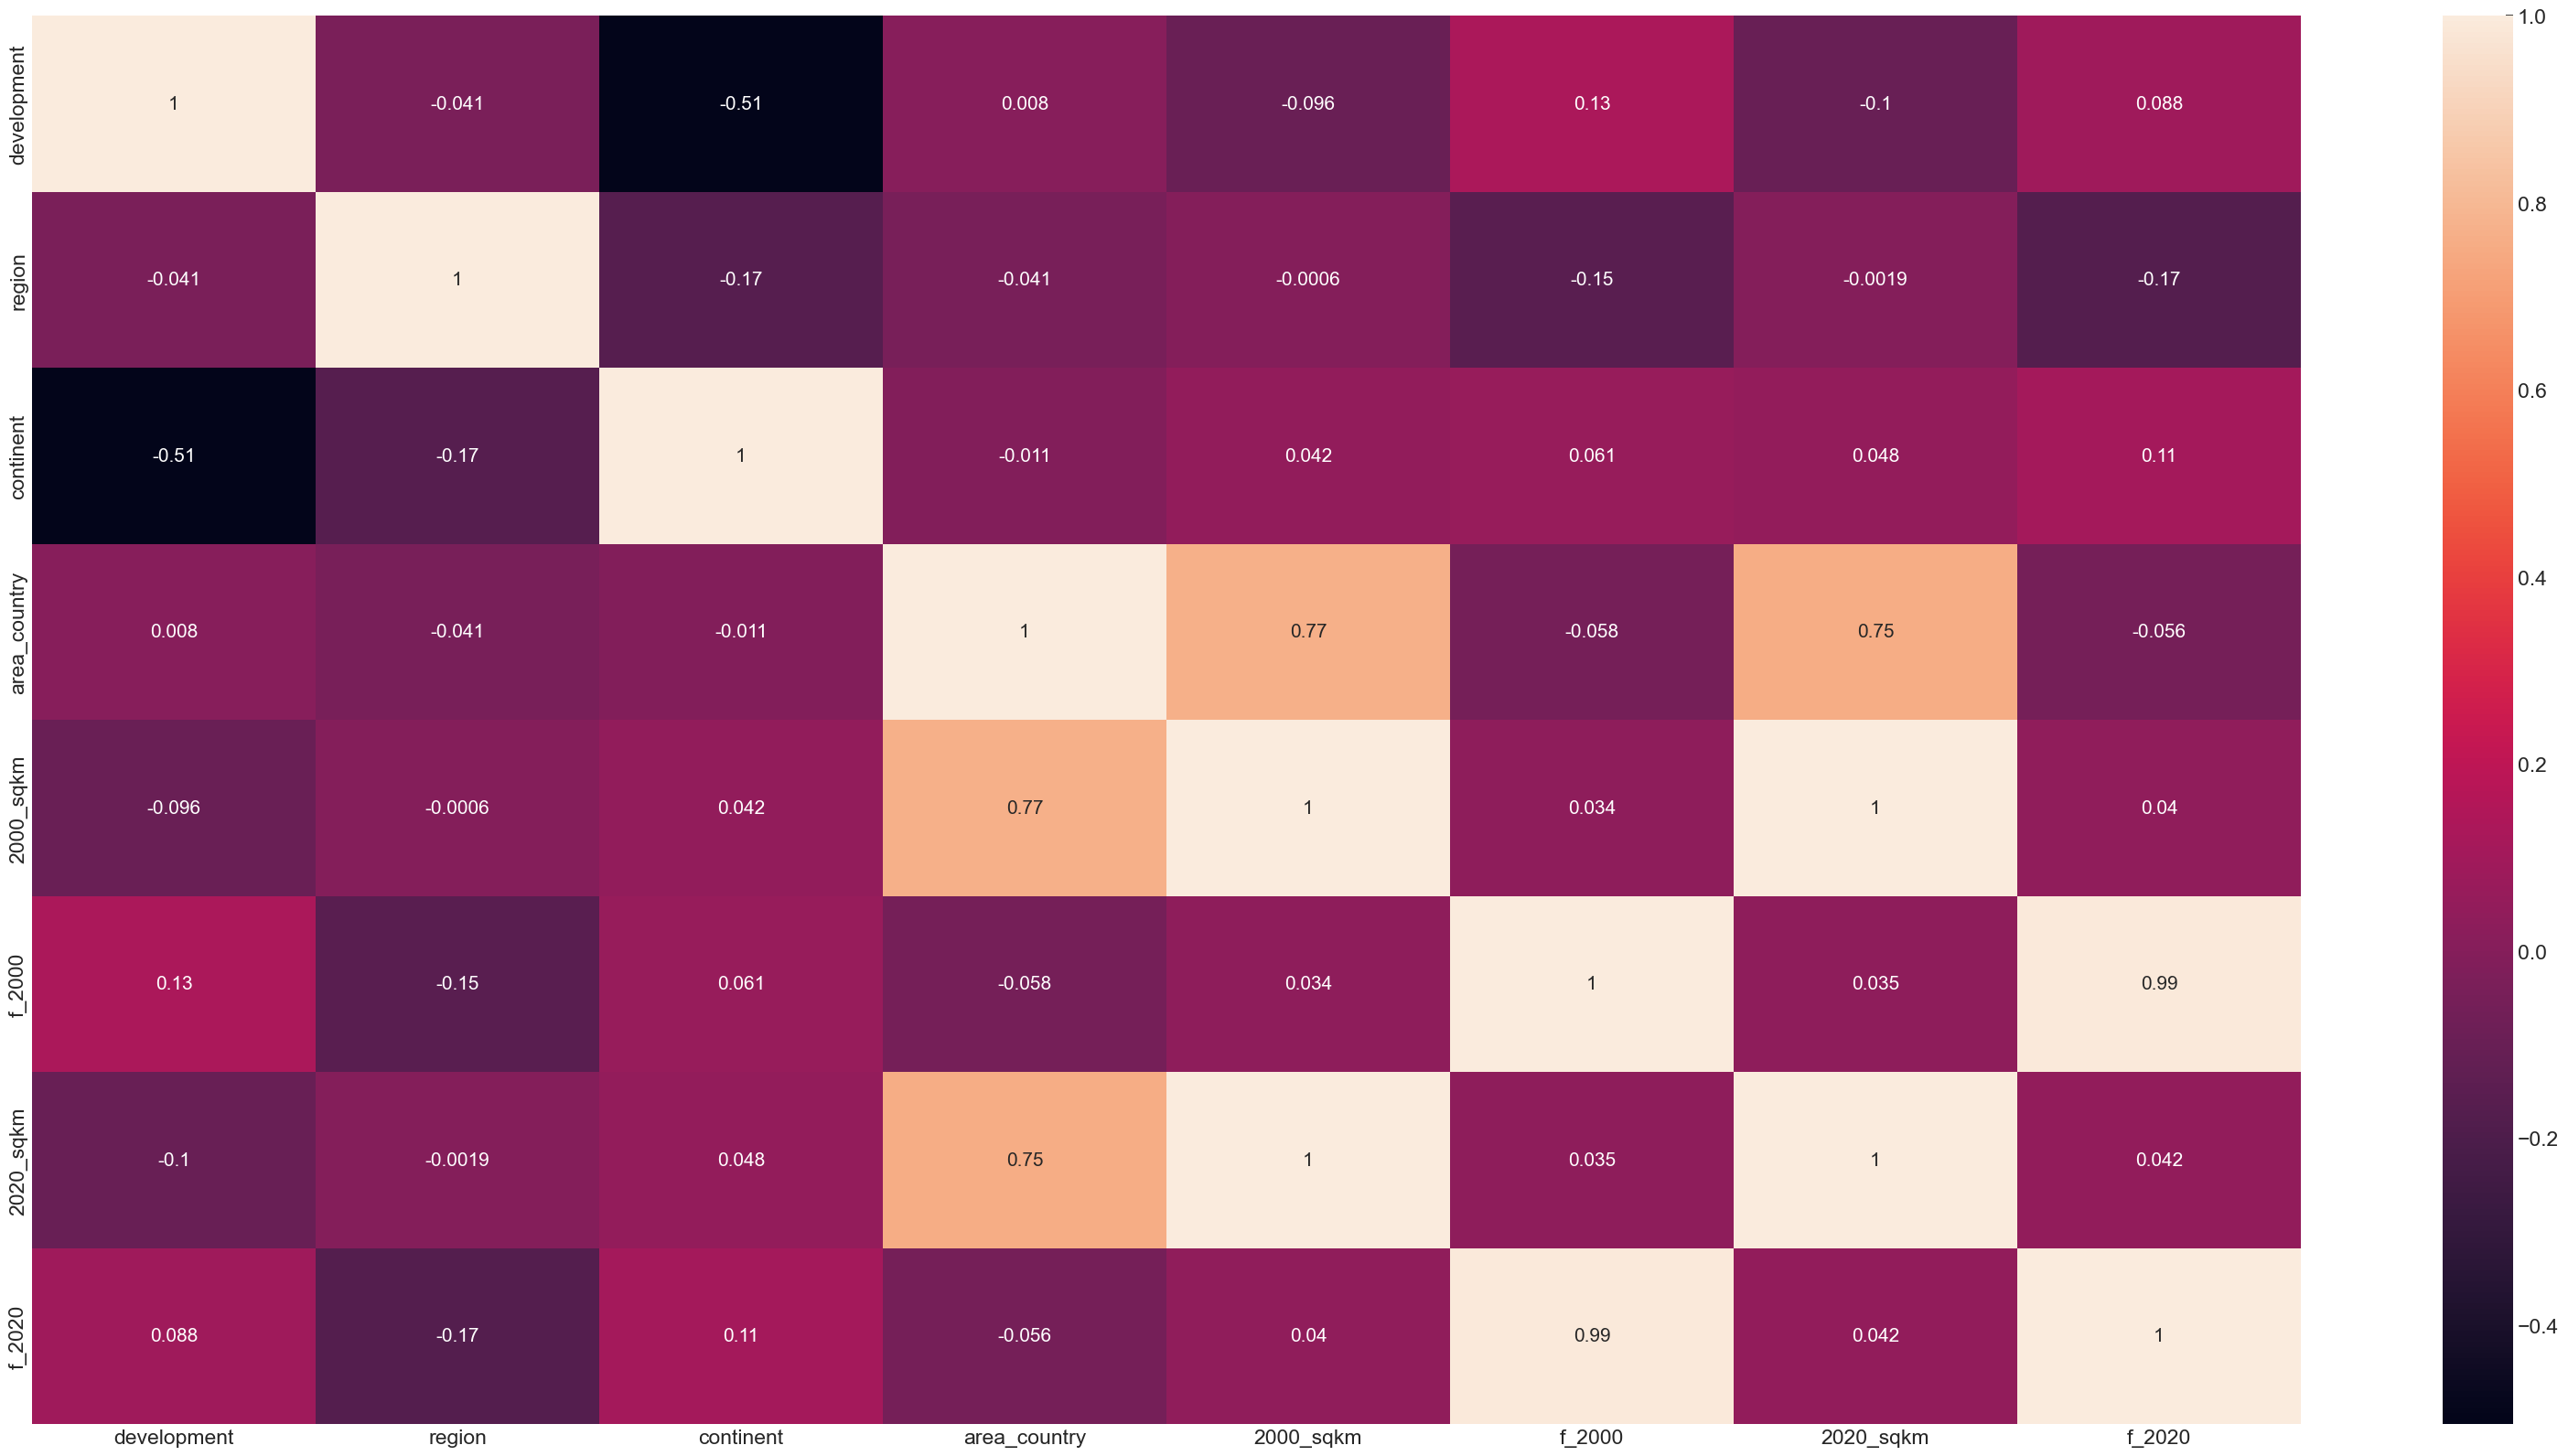

In [618]:
plt.figure(figsize=(40, 20))
sns.heatmap(encoded_dataframe.corr(), annot = True)
plt.show()

As can be observed in the heatmap above, there is no clear relationship between the forest sizing variables and country characterization.

## Handling Outliers

- Boxplot analysis of outliers;

- Using the Interquartile Range (IQR);

- Handling Outliers.

### Boxplot analysis of outliers:

Forests 2000: in the area percent, it's harder to identify the outliers, for the short range. So, to identify outliers, we will use the absolute area values:

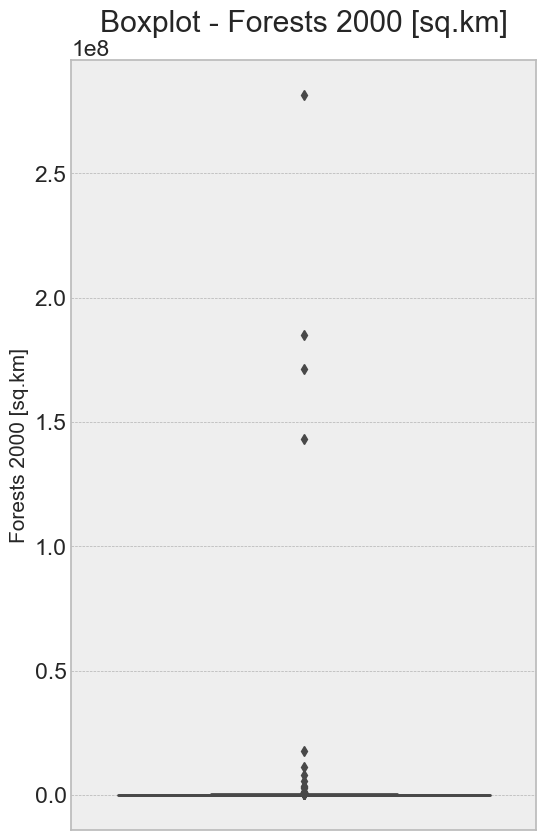

In [619]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe, y= '2000_sqkm')
plt.ylabel("Forests 2000 [sq.km]")
plt.title("Boxplot - Forests 2000 [sq.km]")
plt.show()

There are may outliers in the boxplot analysis.

Forests 2020:

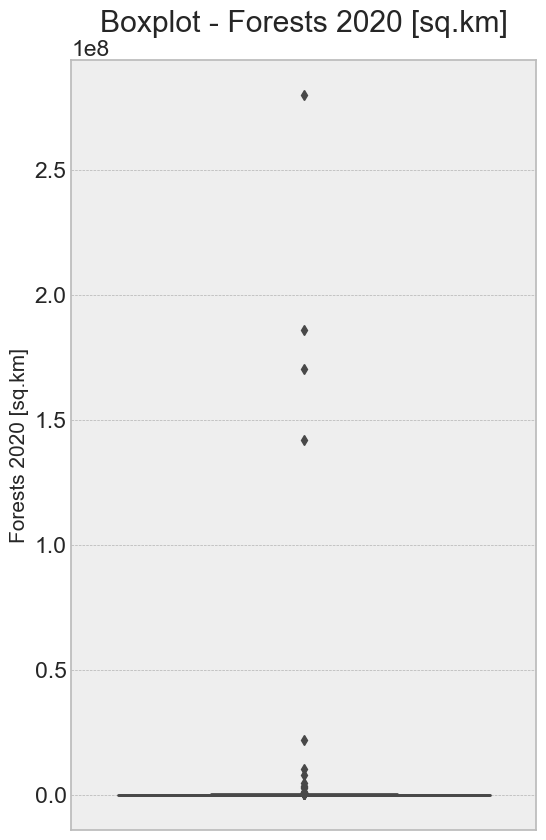

In [620]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe, y= '2020_sqkm')
plt.ylabel("Forests 2020 [sq.km]")
plt.title("Boxplot - Forests 2020 [sq.km]")
plt.show()

There are may outliers in the boxplot analysis.

### Using IQR to filter data for a better comprehension

Forests 2000:

In [621]:
# Find the 75th and 25th percentiles
f_seventy_fifth_2000 = dataframe['2000_sqkm'].quantile(0.75)
f_twenty_fifth_2000 = dataframe['2000_sqkm'].quantile(0.25)

# Calculate iqr
f_iqr_2000 = f_seventy_fifth_2000 - f_twenty_fifth_2000

# Calculate the thresholds
upper = f_seventy_fifth_2000 + (1.5 * f_iqr_2000)
lower = f_twenty_fifth_2000 - (1.5 * f_iqr_2000)

# Subset the data
dataframe_no_outliers = dataframe[(dataframe['2000_sqkm'] > lower) & (dataframe['2000_sqkm'] < upper)]

print(dataframe_no_outliers['2000_sqkm'].describe())

count       175.000000
mean      44251.106914
std       64652.038738
min           0.000000
25%         397.285000
50%       12667.000000
75%       63346.080000
max      248640.210000
Name: 2000_sqkm, dtype: float64


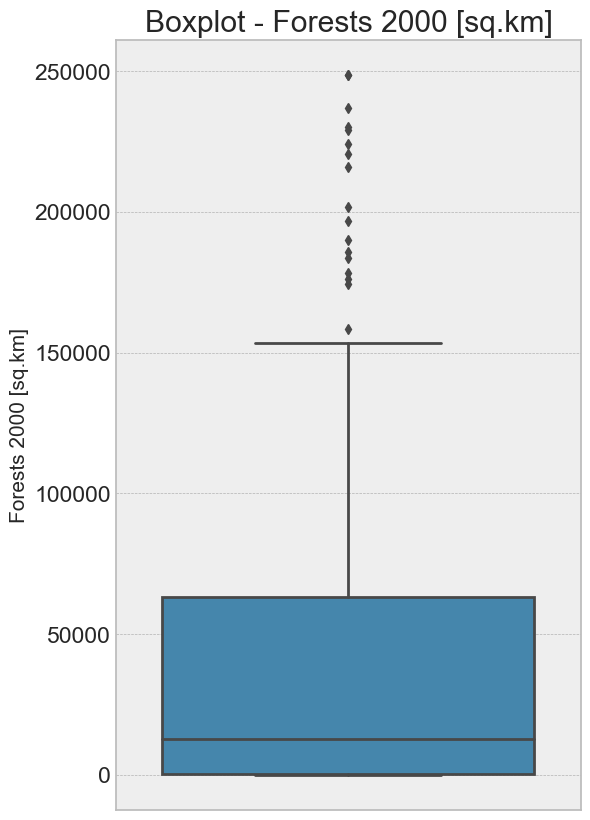

In [622]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe_no_outliers, y= '2000_sqkm')
plt.ylabel("Forests 2000 [sq.km]")
plt.title("Boxplot - Forests 2000 [sq.km]")
plt.show()

Forests 2020:

In [623]:
# Find the 75th and 25th percentiles
f_seventy_fifth_2020 = dataframe_no_outliers['2020_sqkm'].quantile(0.75)
f_twenty_fifth_2020 = dataframe_no_outliers['2020_sqkm'].quantile(0.25)

# Calculate iqr
f_iqr_2020 = f_seventy_fifth_2020 - f_twenty_fifth_2020

# Calculate the thresholds
upper_2020 = f_seventy_fifth_2020 + (1.5 * f_iqr_2020)
lower_2020 = f_twenty_fifth_2020 - (1.5 * f_iqr_2020)

# Subset the data
dataframe_no_outliers = dataframe_no_outliers[(dataframe['2020_sqkm'] > lower_2020) & (dataframe_no_outliers['2020_sqkm'] < upper_2020)]

print(dataframe_no_outliers['2020_sqkm'].describe())

count       156.000000
mean      24546.475096
std       34369.999378
min           0.000000
25%         284.175000
50%        8260.091000
75%       34350.555000
max      146371.343000
Name: 2020_sqkm, dtype: float64


C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13088\4209058803.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe_no_outliers = dataframe_no_outliers[(dataframe['2020_sqkm'] > lower_2020) & (dataframe_no_outliers['2020_sqkm'] < upper_2020)]


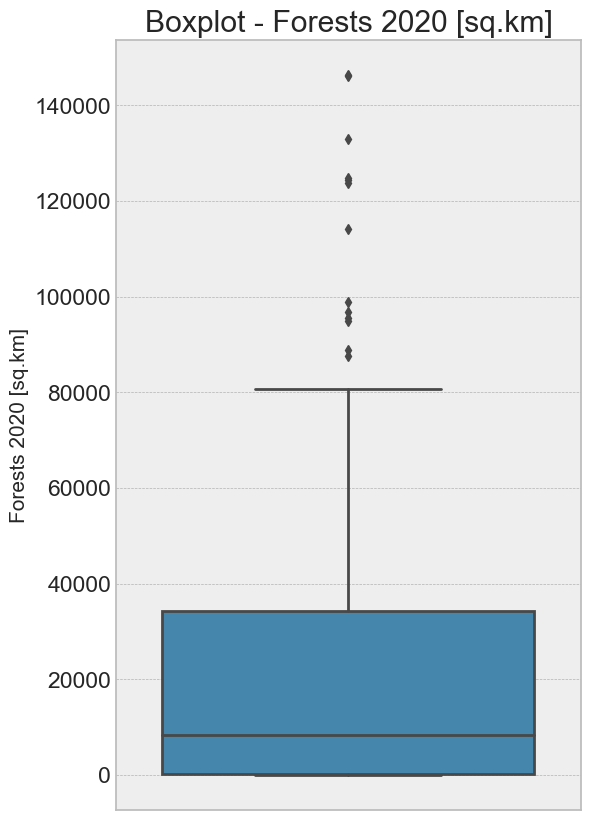

In [624]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe_no_outliers, y= '2020_sqkm')
plt.ylabel("Forests 2020 [sq.km]")
plt.title("Boxplot - Forests 2020 [sq.km]")
plt.show()

### Handling Outliers



In [625]:
# Number of outlier:
number_outliers = len(dataframe)-len(dataframe_no_outliers)

print('The number of outliers in the dataset is: ',number_outliers, 'and, the leght of the hole dataset is: ',len(dataframe), 'resting', len(dataframe_no_outliers),', ',\
    (len(dataframe_no_outliers)/len(dataframe))*100,'%')

The number of outliers in the dataset is:  80 and, the leght of the hole dataset is:  236 resting 156 ,  66.10169491525424 %


Due to the large number of outliers in relation to the dataset (approximately 40%), we will apply a logarithmic transformation to the area [sqkm] values to concentrate them in a smaller range for analysis.

## Logarithmic Transformation

Logarithmic transformation is useful when the data shows an asymmetric distribution or when the values are concentrated in a very wide range. Applying the logarithm reduces the scale of the values, making them closer together and reducing the influence of extremely high values.

In [626]:
logarithmic_transformation = dataframe[['country', 'country_name', 'development', 'region', 'continent', '2000_sqkm', '2020_sqkm']].copy()

logarithmic_transformation['2000_sqkm'] = np.log(logarithmic_transformation['2000_sqkm'])
logarithmic_transformation['2020_sqkm'] = np.log(logarithmic_transformation['2020_sqkm'])

logarithmic_transformation.head(5)

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,country_name,development,region,continent,2000_sqkm,2020_sqkm
0,AFG,Afghanistan,Developing,Southern Asia,Asia,9.424836,9.424836
1,ALB,Albania,Developed,Southern Europe,Europe,8.948898,8.973503
2,DZA,Algeria,Developing,Northern Africa,Africa,9.721497,9.855029
3,ASM,American Samoa,Developing,Polynesia,Oceania,5.178407,5.144000
4,AND,Andorra,Developed,Southern Europe,Europe,5.073923,5.073923


## Analyzing the area distribution again with logarithmic transformation

First, let's compare the distribution of values without transformation and with logarithmic transformation using histplot.

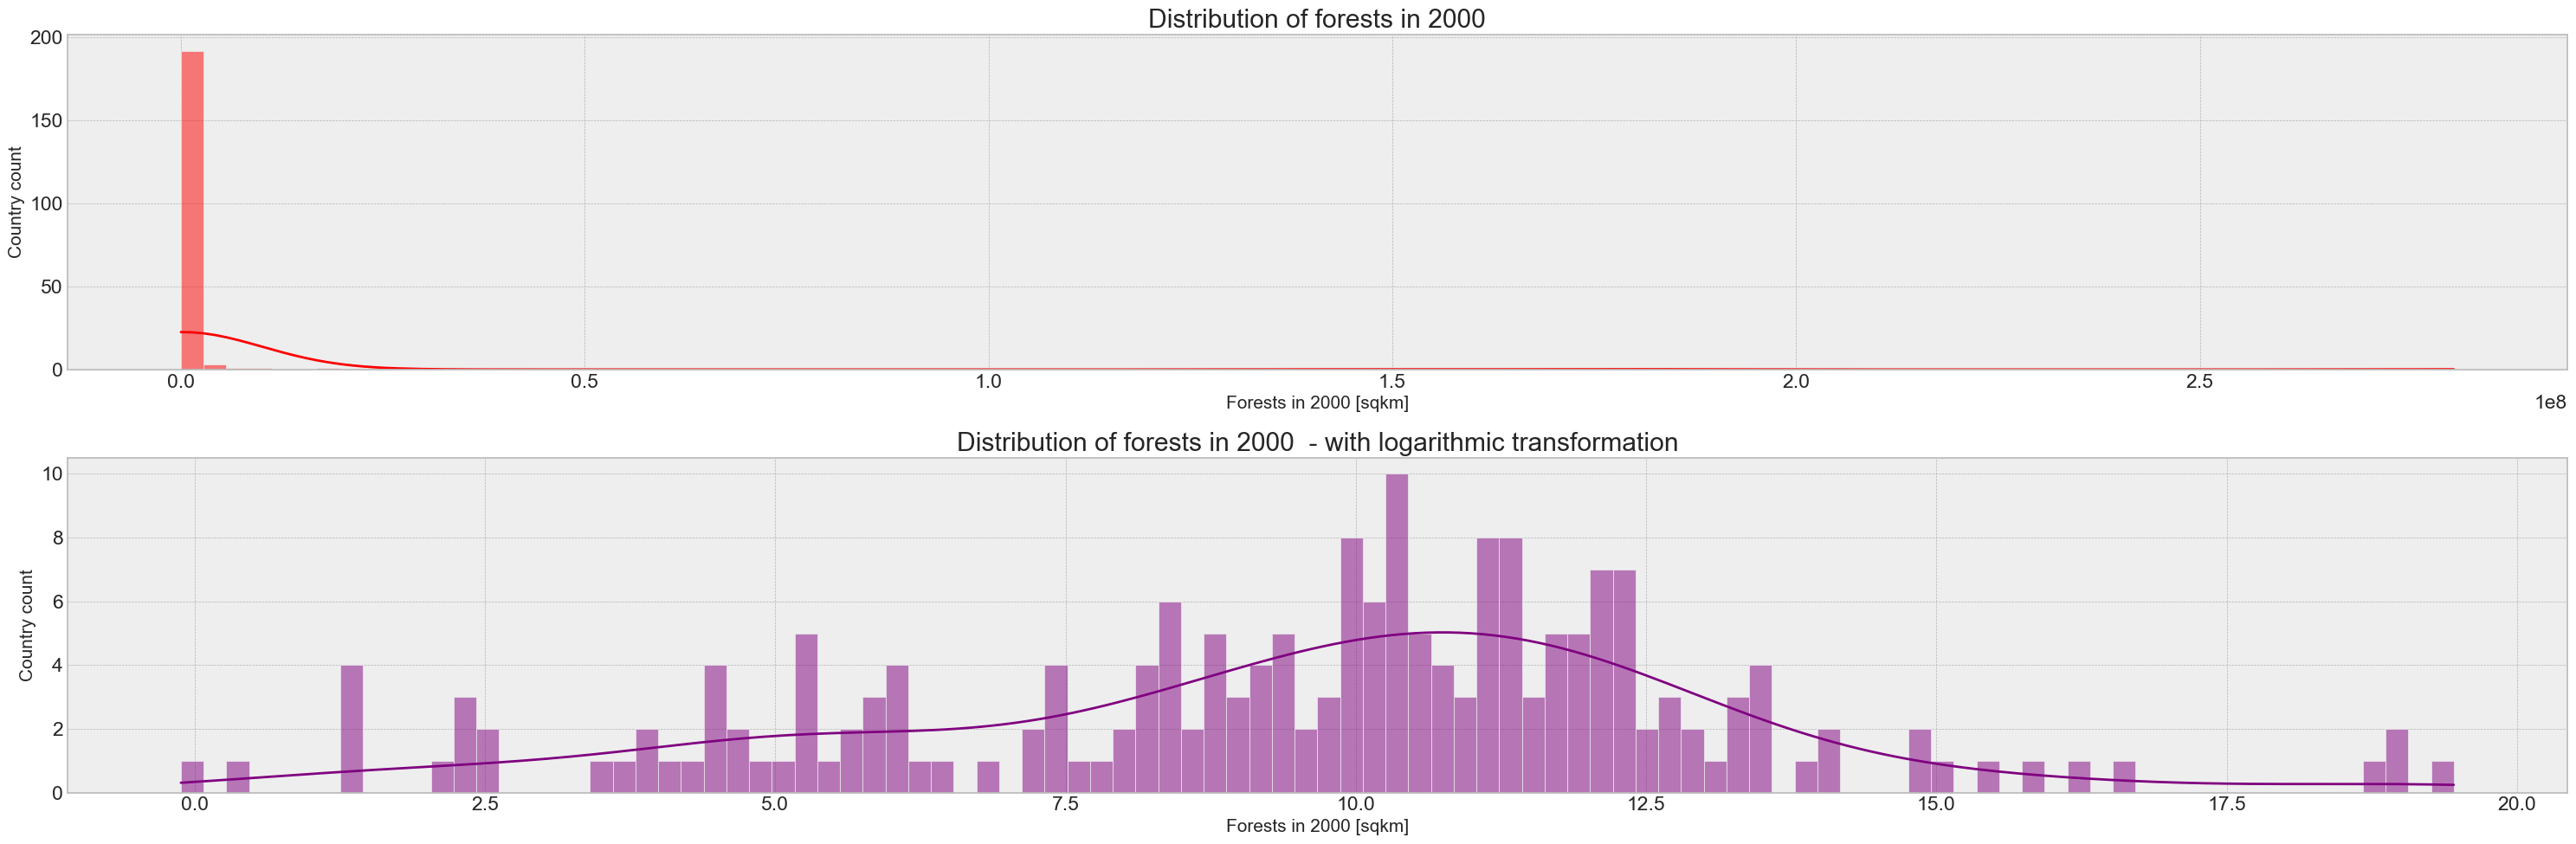

In [627]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

sns.histplot(data=dataframe, x="2000_sqkm", kde=True, bins=100, color="red", ax=axes[0])
axes[0].set_xlabel('Forests in 2000 [sqkm]')
axes[0].set_ylabel('Country count')
axes[0].set_title('Distribution of forests in 2000')

sns.histplot(data=logarithmic_transformation, x="2000_sqkm", kde=True, bins=100, color="purple", ax=axes[1])
axes[1].set_xlabel('Forests in 2000 [sqkm]')
axes[1].set_ylabel('Country count')
axes[1].set_title('Distribution of forests in 2000  - with logarithmic transformation')

plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


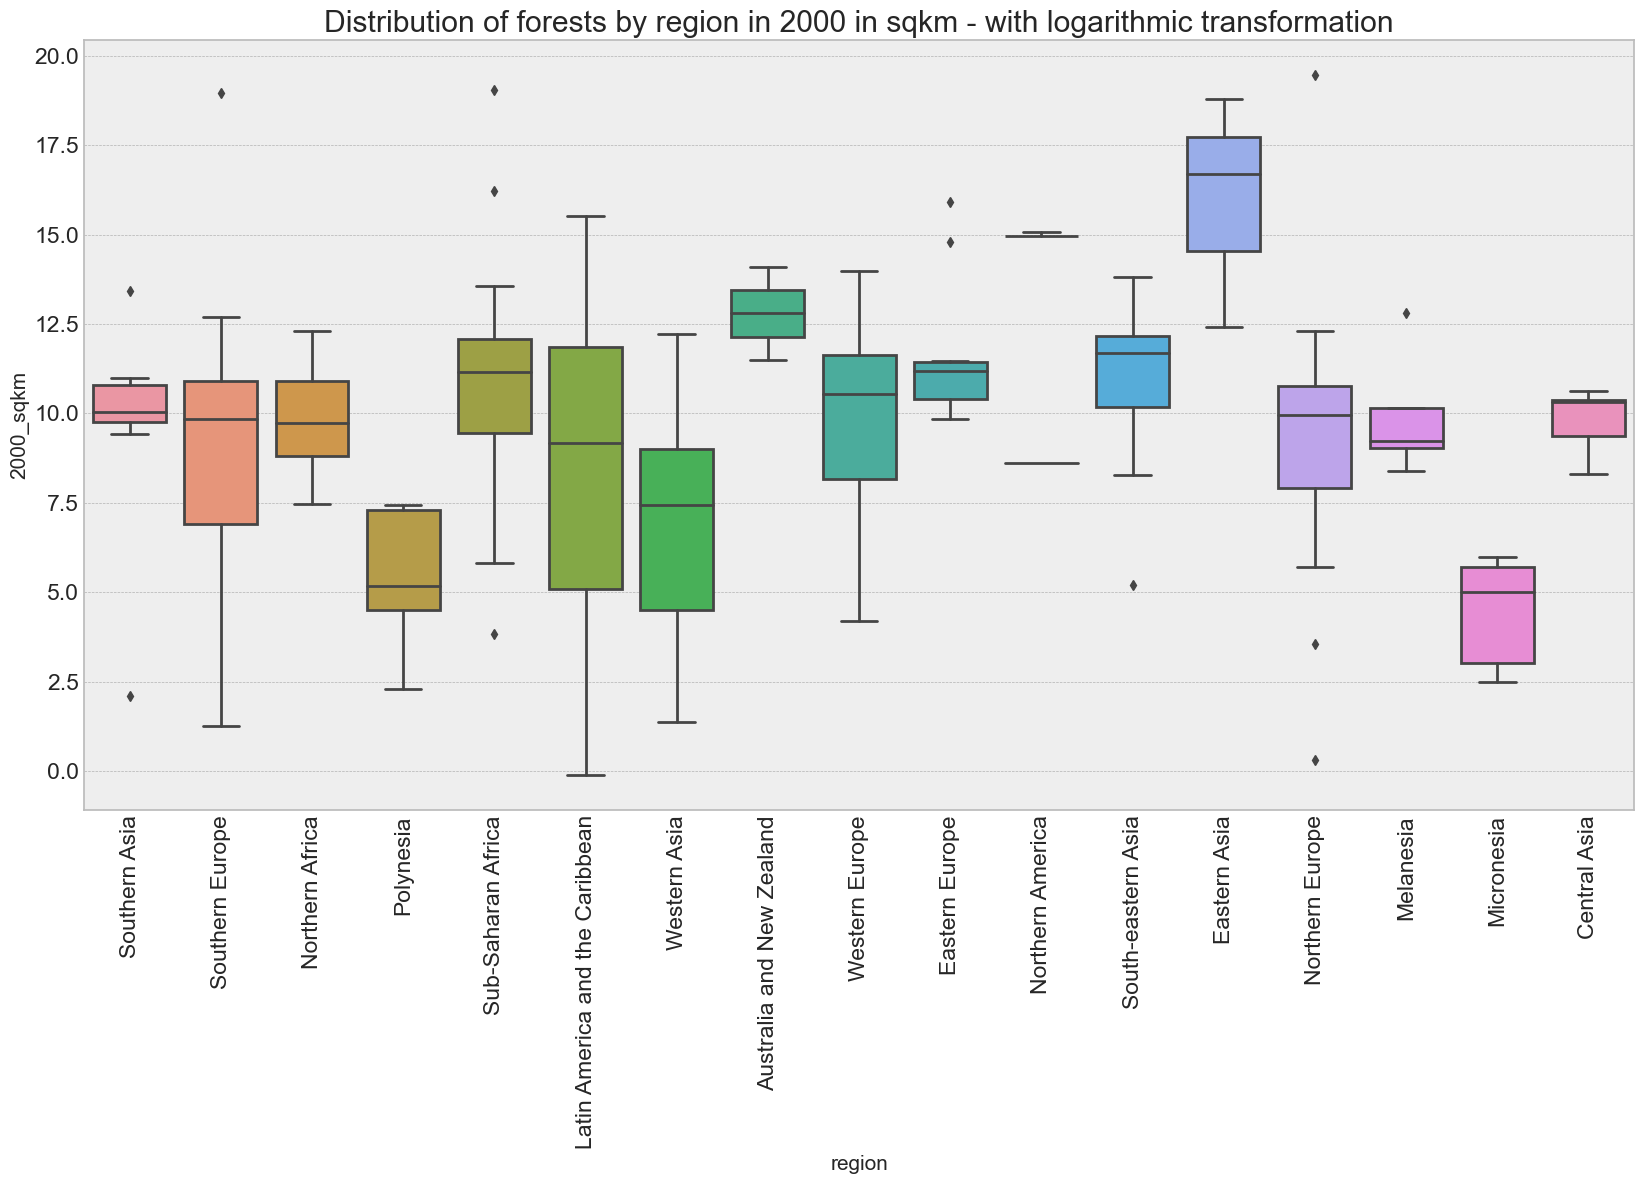

In [628]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='region', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 in sqkm - with logarithmic transformation")
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


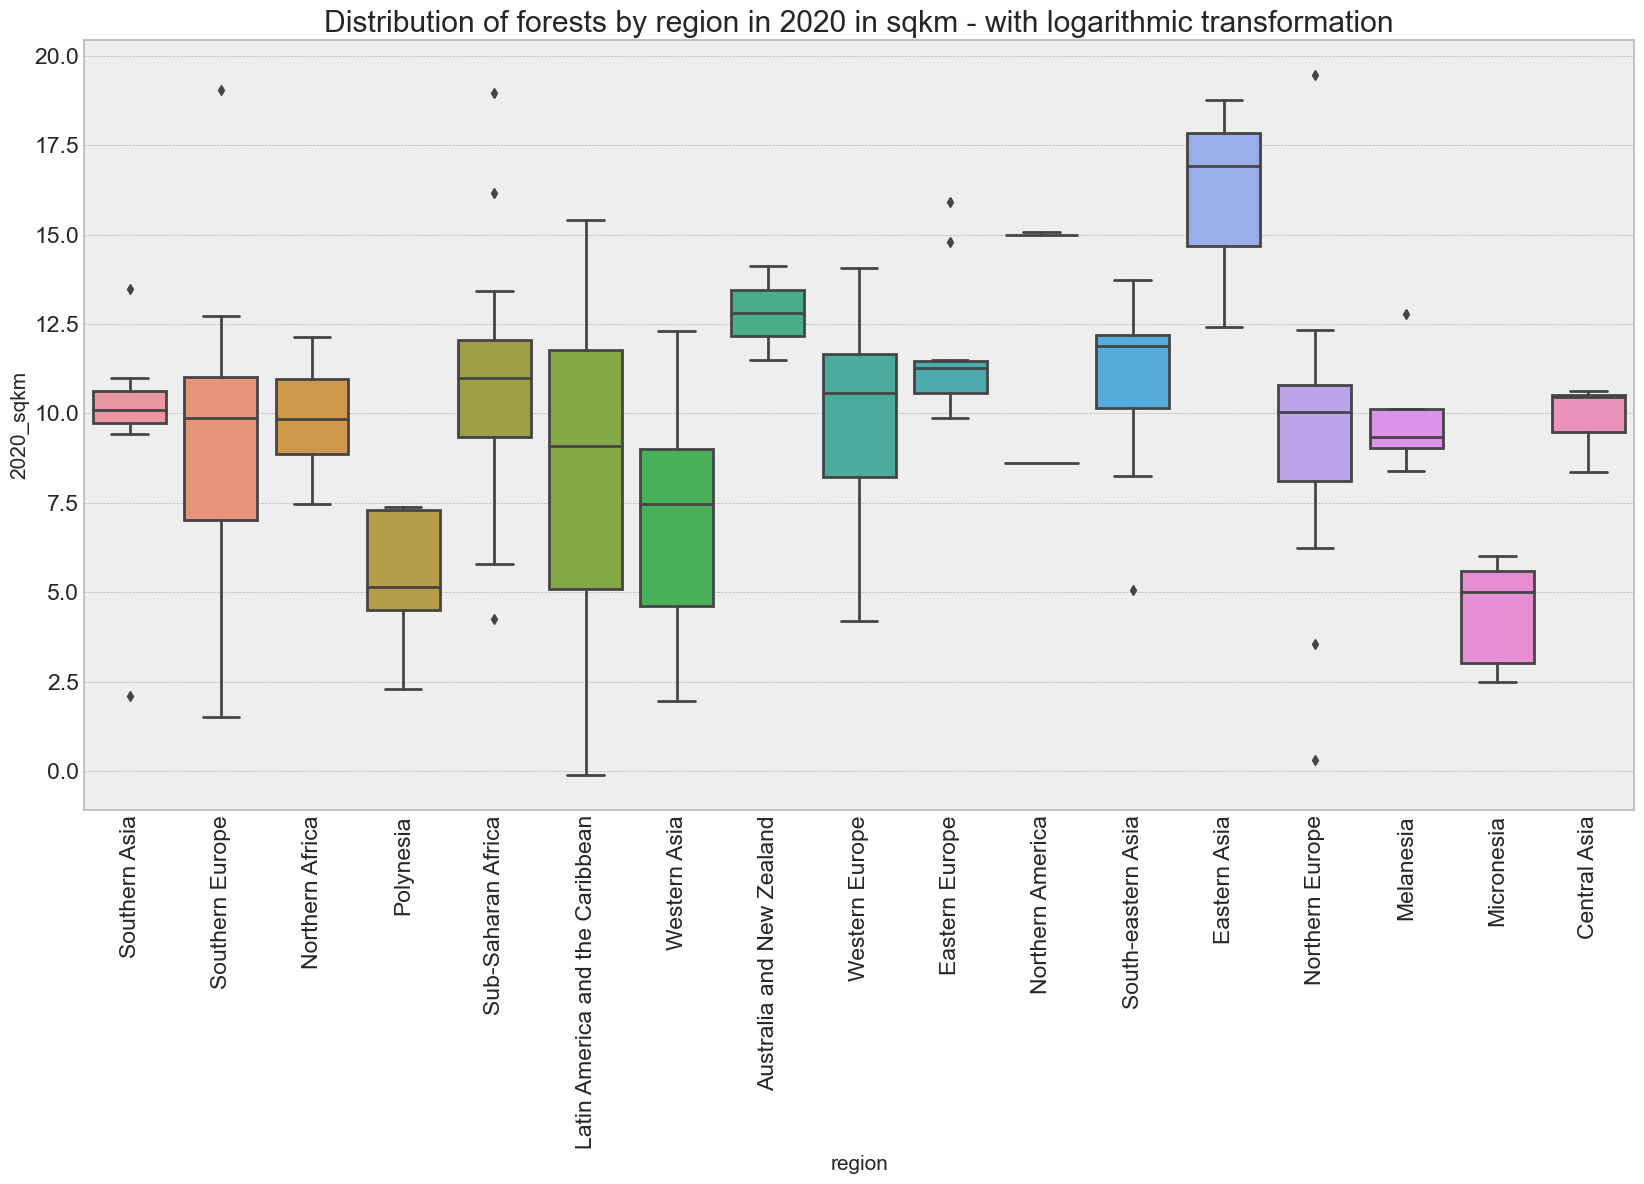

In [629]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='region', y = '2020_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2020 in sqkm - with logarithmic transformation")
plt.show()

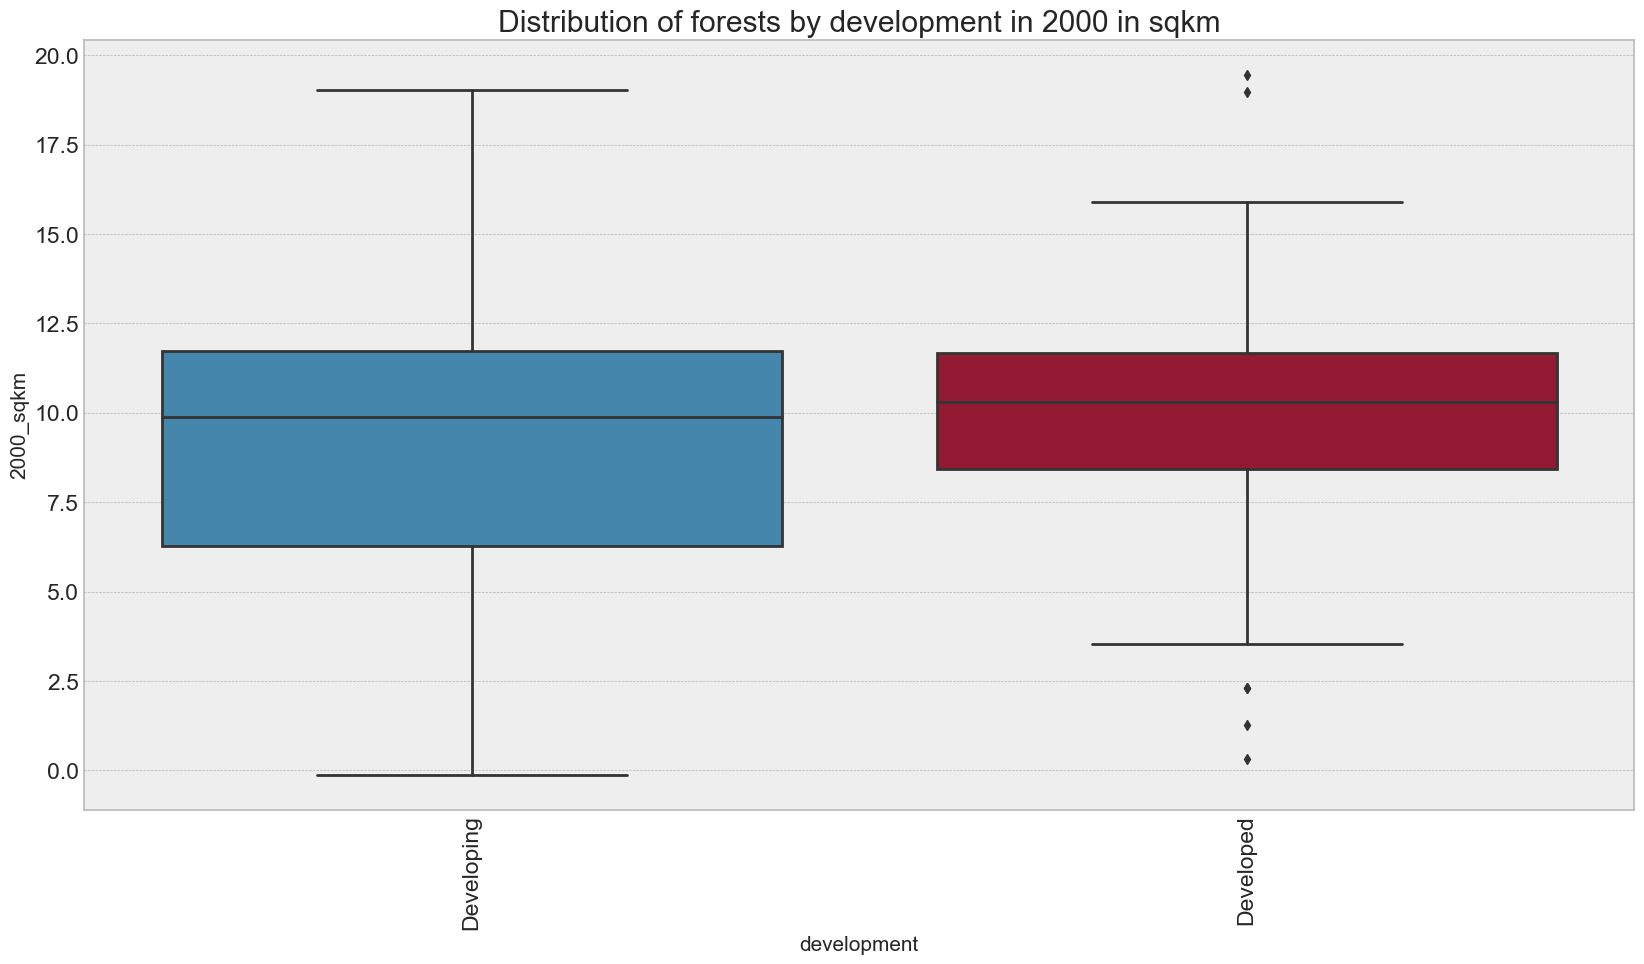

In [630]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='development', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2000 in sqkm")
plt.show()